# Missing Value Imputation methods - Imputed alongside with different missing rates simulator

## Missing Value Imputation - Trying methods such :
## Mean, Most Frequent imputation, Interpolation techniques using Pattern sequence, KNN, Ensemble trees, Iterative Imputer using Bayesian Ridge and Simpler methods such as Backward fill and Forward fill.
## Missing rates - 15%, 20%, 25% and 30%
## Strictly time series dataset Multiple imputation.


Importing necessary packages

In [ ]:
!pip install wget

import wget
wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')
#import torch
import numpy as np
import pandas as pd
#from utils import *

import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

In [ ]:
np.random.seed(0)
n = 100
p = 2

mu_X = np.repeat(1, p)
Sigma_X = np.array([[1, 1], [1, 4]])
X_complete_cont = np.random.multivariate_normal(mu_X, Sigma_X, size=n)

from scipy.stats import poisson

lamb = 0.5
X_complete_discr = poisson.rvs(lamb, size=n)
X_complete_discr = np.expand_dims(X_complete_discr, axis=1)


n_cat = 5
X_complete_cat = np.random.binomial(n=n_cat, p=0.5, size=n)
X_complete_cat = np.expand_dims(X_complete_cat, axis=1)

X_complete = np.concatenate((X_complete_cont, X_complete_discr, X_complete_cat),axis=1)

X_complete = pd.DataFrame(X_complete)
X_complete.iloc[:, 3] = X_complete.iloc[:, 3].astype('category')
X_complete.iloc[:, 3].cat.categories = ["F", "E", "D", "C", "B", "A"]
X_complete.head()

,0,1,2,3
0,2.380172,4.405363,1.0,F
1,3.379180,2.400869,0.0,D
2,1.341582,4.944151,0.0,E
3,1.450141,2.922843,0.0,D
4,1.266093,0.695726,2.0,D


In [ ]:
def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)

    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()

    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan

    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}


In [ ]:
X_miss_mcar = produce_NA(X_complete_cont, p_miss=0.4, mecha="MCAR")

X_mcar = X_miss_mcar['X_incomp']
R_mcar = X_miss_mcar['mask']

In [ ]:
X_mcar_array = X_mcar.numpy()

In [ ]:
pd.DataFrame(X_mcar_array).head().style.highlight_null(null_color='orange')

,0,1
0,2.380172,nan
1,nan,2.400869
2,1.341582,4.944151
3,nan,2.922843
4,1.266093,nan


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
!pip install tools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 6.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46756 sha256=579cfeebc6d34d96a1a553b12d9d2cd517c5d54940f674860ab54be41a43f58d
  Stored in directory: /root/.cache/pip/wheels/32/f1/c1/7b783d8f54066026fa6b442246d52664df9db01ed64d6eb096
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32525 sha256=fd95c8b4f1f7e9e24f8ef57a834370edd0b3db25338c5b54ea823f6b7f743c7d
  Stored in directory: /root/.cache/pip/wheels/19/44/3e/fed804565a6a9150b66cdf6312f1a0577c0a54c429c4911423
Successfully built tools pytils


In [ ]:
import matplotlib.pyplot as plt

# Mean Imputer

In [ ]:
X_mean_mcar = SimpleImputer().fit_transform(X_mcar_array)
#pd.DataFrame(x_mean).head().style.applymap(color_imputedvalues_orange, x_miss=X_miss_mcar)

In [ ]:
pd.DataFrame(X_mean_mcar).head()

,0,1
0,2.380172,0.789401
1,1.052192,2.400869
2,1.341582,4.944151
3,1.052192,2.922843
4,1.266093,0.789401


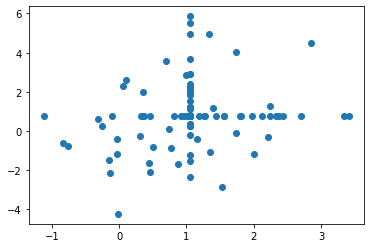

In [ ]:
plt.scatter(X_mean_mcar[:400,0], X_mean_mcar[:400,1])


 # Itertative Imputer

In [ ]:
# Iterative imputation
X_itr_mcar = IterativeImputer().fit_transform(X_mcar_array)
pd.DataFrame(X_itr_mcar)

,0,1
0,2.380172,2.888407
1,1.558754,2.400869
2,1.341582,4.944151
3,1.721799,2.922843
4,1.266093,1.218356
...,...,...
95,0.436279,-1.631338
96,1.185101,1.204655
97,1.458643,2.080375
98,2.122047,2.501467


# Dataset - 1

In [ ]:
pwd

'/content'

In [ ]:
dataset_1 = pd.read_excel('AirQualityUCI.xlsx')

In [ ]:
dataset_1.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
dataset_1.isnull().sum()

In [ ]:
dataset_1.shape

In [ ]:
dataset_1.columns

In [ ]:
dataset_1_continous = dataset_1[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]

In [ ]:
dataset_1_continous.describe()

In [ ]:
dataset_1_continous.info()

In [ ]:
dataset_1.isnull().sum()

In [ ]:
dataset_1_continous =  np.array(dataset_1_continous)

# MCAR mechanism with different missing rates

## 15% missing rate with MCAR mechanism

In [ ]:
dataset1_miss_mcar = produce_NA(dataset_1_continous, p_miss=0.15, mecha="MCAR")


In [ ]:
dataset1_mcar = dataset1_miss_mcar['X_incomp']
Miss_15_1 = pd.DataFrame(dataset1_miss_mcar['mask'])

In [ ]:
dataset1_mcar = dataset1_mcar.numpy()

In [ ]:
dataset1_mcar_15 = pd.DataFrame(dataset1_mcar)


In [ ]:
dataset1_mcar_15.isnull().sum()

In [ ]:
dataset1_mcar_15.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.600000,nan,150.000000,11.881723,1045.500000,166.000000,nan,113.000000,nan,nan,13.600000,48.875000,0.757754
1,2.000000,1292.250000,112.000000,nan,954.750000,103.000000,1173.750000,92.000000,1558.750000,nan,13.300000,47.700001,0.725487
2,2.200000,1402.000000,88.000000,8.997817,939.250000,131.000000,1140.000000,114.000000,1554.500000,1074.000000,11.900000,53.975002,0.750239
3,2.200000,1375.500000,80.000000,9.228796,948.250000,172.000000,1092.000000,122.000000,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,1.600000,1272.250000,51.000000,6.518224,835.500000,131.000000,1205.000000,116.000000,nan,1110.000000,nan,59.575001,0.788794


## 20% missing rate with MCAR mechanism

In [ ]:
dataset1_miss_mcar_20 = produce_NA(dataset_1_continous, p_miss=0.20, mecha="MCAR")
dataset1_mcar_15 = pd.DataFrame(dataset1_mcar).head().style.highlight_null(null_color='orange')

In [ ]:
dataset1_mcar_20 = dataset1_miss_mcar_20['X_incomp']

In [ ]:
dataset1_mcar_20_np = dataset1_mcar_20.numpy()

In [ ]:
dataset1_mcar_20 = pd.DataFrame(dataset1_mcar_20_np)

In [ ]:
dataset1_mcar_20.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.600000,1360.000000,150.000000,11.881723,1045.500000,166.000000,1056.250000,113.000000,1692.000000,1267.500000,13.600000,48.875000,0.757754
1,2.000000,1292.250000,112.000000,9.397165,954.750000,103.000000,1173.750000,92.000000,1558.750000,972.250000,13.300000,47.700001,0.725487
2,2.200000,1402.000000,88.000000,8.997817,nan,131.000000,1140.000000,114.000000,1554.500000,nan,11.900000,53.975002,0.750239
3,2.200000,1375.500000,nan,9.228796,948.250000,nan,1092.000000,122.000000,nan,1203.250000,11.000000,60.000000,0.786713
4,1.600000,1272.250000,51.000000,6.518224,835.500000,131.000000,1205.000000,116.000000,nan,nan,11.150000,59.575001,nan


## 25% missing rate using MCAR mechanism

In [ ]:
dataset1_miss_mcar_25 = produce_NA(dataset_1_continous, p_miss=0.25, mecha="MCAR")


In [ ]:
dataset1_mcar_25 = dataset1_miss_mcar_25['X_incomp']

In [ ]:
dataset1_mcar_25_np = dataset1_mcar_25.numpy()

In [ ]:
dataset1_mcar_25 = pd.DataFrame(dataset1_mcar_25_np)

In [ ]:
dataset1_mcar_25.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.600000,1360.000000,nan,11.881723,nan,166.000000,1056.250000,113.000000,1692.000000,1267.500000,13.600000,nan,0.757754
1,2.000000,1292.250000,nan,9.397165,954.750000,nan,nan,nan,nan,nan,nan,47.700001,0.725487
2,2.200000,nan,88.000000,nan,939.250000,131.000000,1140.000000,114.000000,nan,nan,11.900000,53.975002,0.750239
3,2.200000,1375.500000,80.000000,9.228796,948.250000,nan,nan,122.000000,nan,nan,nan,60.000000,nan
4,nan,1272.250000,nan,nan,835.500000,nan,1205.000000,nan,nan,1110.000000,11.150000,59.575001,0.788794


# 30% Missingness

In [ ]:
dataset1_miss_mcar_30 = produce_NA(dataset_1_continous, p_miss=0.30, mecha="MCAR")


In [ ]:
dataset1_mcar_30 = dataset1_miss_mcar_30['X_incomp']

In [ ]:
dataset1_mcar_30_np = dataset1_mcar_30.numpy()

In [ ]:
dataset1_mcar_30 = pd.DataFrame(dataset1_mcar_30_np)

In [ ]:
dataset1_mcar_30.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.600000,1360.000000,150.000000,11.881723,1045.500000,nan,1056.250000,nan,1692.000000,1267.500000,13.600000,48.875000,0.757754
1,2.000000,nan,112.000000,nan,nan,103.000000,1173.750000,nan,1558.750000,nan,nan,47.700001,0.725487
2,2.200000,nan,88.000000,8.997817,nan,131.000000,1140.000000,nan,1554.500000,1074.000000,11.900000,nan,nan
3,2.200000,1375.500000,nan,nan,948.250000,172.000000,1092.000000,nan,nan,1203.250000,11.000000,60.000000,0.786713
4,1.600000,nan,51.000000,6.518224,835.500000,131.000000,1205.000000,nan,nan,1110.000000,nan,59.575001,nan


# Imputation method - Different mechanism - Dataset-3

## Mean Imputation

## MCAR mechanism with different missing rates-

In [ ]:
dataset1_mean_mcar_15 = SimpleImputer().fit_transform(dataset1_mcar)
dataset1_mean_mcar_20 = SimpleImputer().fit_transform(dataset1_mcar_20_np)
dataset1_mean_mcar_25 = SimpleImputer().fit_transform(dataset1_mcar_25_np)
dataset1_mean_mcar_30 = SimpleImputer().fit_transform(dataset1_mcar_30)
dataset1_mean_mcar_15 = pd.DataFrame(dataset1_mean_mcar_15)
dataset1_mean_mcar_20 = pd.DataFrame(dataset1_mean_mcar_20)
dataset1_mean_mcar_20 = pd.DataFrame(dataset1_mean_mcar_25)
dataset1_mean_mcar_30 = pd.DataFrame(dataset1_mean_mcar_30)



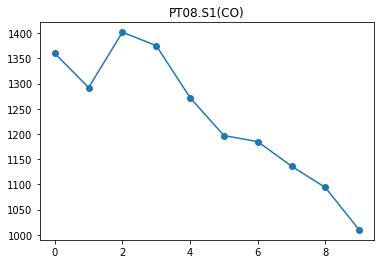

In [ ]:
dataset_1['PT08.S1(CO)'][:10].plot(title='PT08.S1(CO)', marker='o')

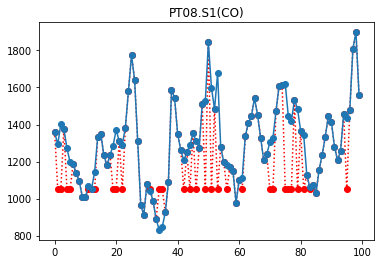

In [ ]:
dataset1_mean_mcar_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

## Mode Imputation

In [ ]:
dataset1_mode_mcar_15 = SimpleImputer(strategy='most_frequent').fit_transform(dataset1_mcar)
dataset1_mode_mcar_20 = SimpleImputer(strategy='most_frequent').fit_transform(dataset1_mcar_20_np)
dataset1_mode_mcar_25 = SimpleImputer(strategy='most_frequent').fit_transform(dataset1_mcar_25_np)
dataset1_mode_mcar_30 = SimpleImputer(strategy='most_frequent').fit_transform(dataset1_mcar_30_np)
dataset1_mode_mcar_15 = pd.DataFrame(dataset1_mode_mcar_15)
dataset1_mode_mcar_20 = pd.DataFrame(dataset1_mode_mcar_20)
dataset1_mode_mcar_25 = pd.DataFrame(dataset1_mode_mcar_25)
dataset1_mode_mcar_30 = pd.DataFrame(dataset1_mode_mcar_30)



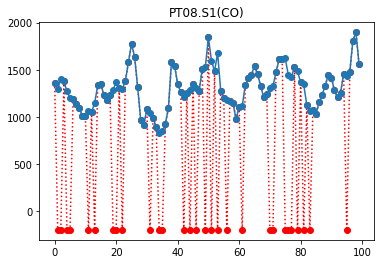

In [ ]:
dataset1_mode_mcar_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

# Iterative Imputer with Bayesian Ridge and Ensemble tree:

## Bayesian

In [ ]:
dataset1_itr_mcar_15 = IterativeImputer().fit_transform(dataset1_mcar)
dataset1_itr_mcar_20 = IterativeImputer().fit_transform(dataset1_mcar_20_np)
dataset1_itr_mcar_25 = IterativeImputer().fit_transform(dataset1_mcar_25_np)
dataset1_itr_mcar_30 = IterativeImputer().fit_transform(dataset1_mcar_30_np)
dataset1_itr_mcar_15 = pd.DataFrame(dataset1_itr_mcar_15)
dataset1_itr_mcar_20 = pd.DataFrame(dataset1_itr_mcar_20)
dataset1_itr_mcar_25 = pd.DataFrame(dataset1_itr_mcar_25)
dataset1_itr_mcar_30 = pd.DataFrame(dataset1_itr_mcar_30)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


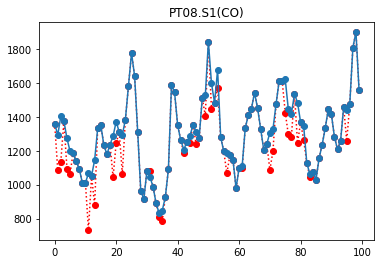

In [ ]:
dataset1_itr_mcar_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

# Ensemble Tree - RandomForest

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
rf = ExtraTreesRegressor(n_estimators=10, random_state=0)

In [ ]:
dataset1_rand_mcar_15 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset1_mcar)
dataset1_rand_mcar_20 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset1_mcar_20_np)
dataset1_rand_mcar_25 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset1_mcar_25_np)
dataset1_rand_mcar_30 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset1_mcar_30_np)
dataset1_rand_mcar_15 = pd.DataFrame(dataset1_rand_mcar_15)
dataset1_rand_mcar_20 = pd.DataFrame(dataset1_rand_mcar_20)
dataset1_rand_mcar_25 = pd.DataFrame(dataset1_rand_mcar_25)
dataset1_rand_mcar_30 = pd.DataFrame(dataset1_rand_mcar_30)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


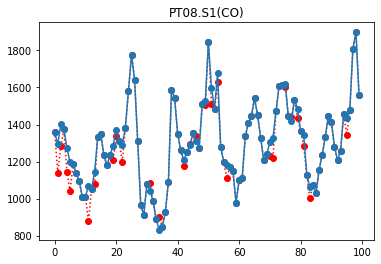

In [ ]:
dataset1_rand_mcar_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

# KNN Imputer for MCAR mechanism - Different missing rates

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn_15 = dataset1_mcar.copy()
df_knn_20 = dataset1_mcar_20_np.copy()
df_knn_25 = dataset1_mcar_25_np.copy()
df_knn_30 = dataset1_mcar_30_np.copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn_15 = pd.DataFrame(scaler.fit_transform(df_knn_15))
df_knn_20 = pd.DataFrame(scaler.fit_transform(df_knn_20))
df_knn_25 = pd.DataFrame(scaler.fit_transform(df_knn_25))
df_knn_30 = pd.DataFrame(scaler.fit_transform(df_knn_30))

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
dataset_1_knn_imputed_15 = pd.DataFrame(knn_imputer.fit_transform(df_knn_15))
dataset_1_knn_imputed_20 = pd.DataFrame(knn_imputer.fit_transform(df_knn_20))
dataset_1_knn_imputed_25 = pd.DataFrame(knn_imputer.fit_transform(df_knn_25))
dataset_1_knn_imputed_30 = pd.DataFrame(knn_imputer.fit_transform(df_knn_30))



# Rescaling the dataset

In [ ]:
dataset_1_knn_imputed_15 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_15)))
dataset_1_knn_imputed_20 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_20)))
dataset_1_knn_imputed_25 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_25)))
dataset_1_knn_imputed_30 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_30)))


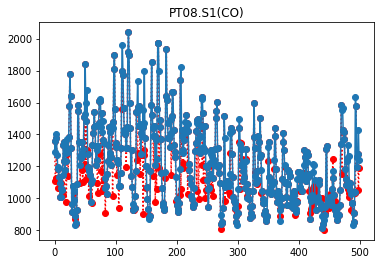

In [ ]:
dataset_1_knn_imputed_30[1][:500].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:500].plot(title='PT08.S1(CO)', marker='o')


# Interpolation using - Linear Interpolation

In [ ]:
dataset1_mcar_15 = pd.DataFrame(dataset1_mcar)
dataset1_mcar_20 = pd.DataFrame(dataset1_mcar_20_np)
dataset1_mcar_25 = pd.DataFrame(dataset1_mcar_25_np)
dataset1_mcar_30 = pd.DataFrame(dataset1_mcar_30_np)

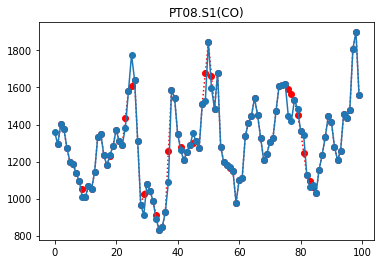

In [ ]:
linear_interpolation_15 = dataset1_mcar_15.interpolate(method='linear')

# Plot imputed data
linear_interpolation_15[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

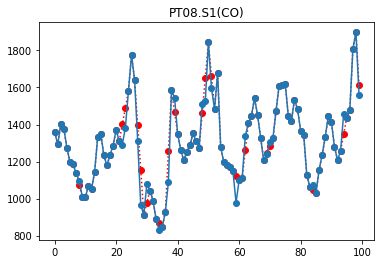

In [ ]:
linear_interpolation_20 = dataset1_mcar_20.interpolate(method='linear')

# Plot imputed data
linear_interpolation_20[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

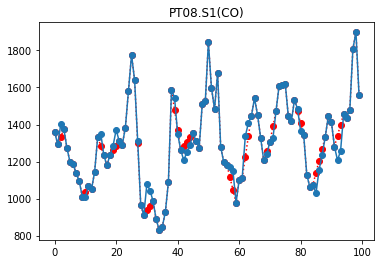

In [ ]:
linear_interpolation_25 = dataset1_mcar_25.interpolate(method='linear')

# Plot imputed data
linear_interpolation_25[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

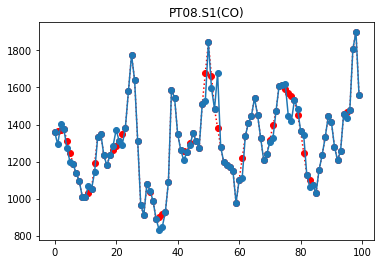

In [ ]:
linear_interpolation_30 = dataset1_mcar_30.interpolate(method='linear')

# Plot imputed data
linear_interpolation_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

# Forward fill and Backward fill

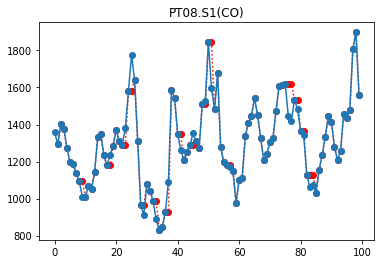

In [ ]:
# Ffill imputation
ffill_imputation_15 = dataset1_mcar_15.fillna(method='ffill')

# Plot imputed data
ffill_imputation_15[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')


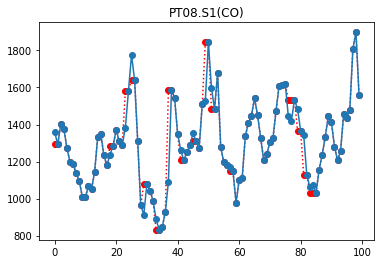

In [ ]:
bfill_imputation_15 = dataset1_mcar_15.fillna(method='bfill')

# Plot imputed data
bfill_imputation_15[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

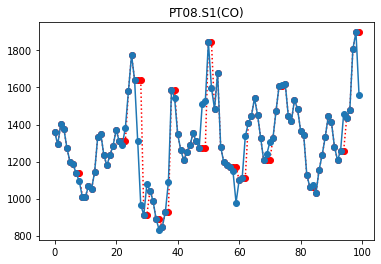

In [ ]:
ffill_imputation_20 = dataset1_mcar_20.fillna(method='ffill')

# Plot imputed data
ffill_imputation_20[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

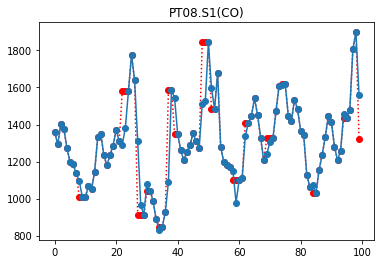

In [ ]:
bfill_imputation_20 = dataset1_mcar_20.fillna(method='bfill')

# Plot imputed data
bfill_imputation_20[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

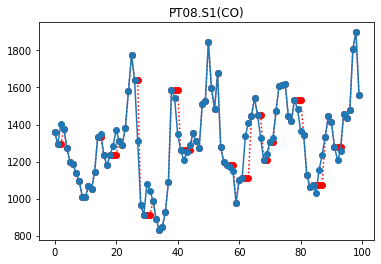

In [ ]:
ffill_imputation_25 = dataset1_mcar_25.fillna(method='ffill')

# Plot imputed data
ffill_imputation_25[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

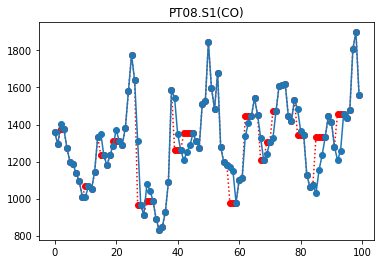

In [ ]:
bfill_imputation_25 = dataset1_mcar_25.fillna(method='bfill')

# Plot imputed data
bfill_imputation_25[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

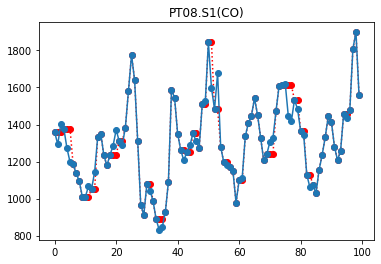

In [ ]:
ffill_imputation_30 = dataset1_mcar_30.fillna(method='ffill')

# Plot imputed data
ffill_imputation_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

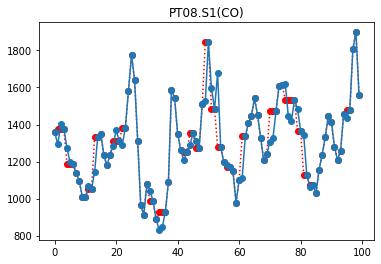

In [ ]:
bfill_imputation_30 = dataset1_mcar_30.fillna(method='bfill')

# Plot imputed data
bfill_imputation_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_1['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

In [ ]:
MAPE = mean_absolute_percentage_error
MAE  = mean_absolute_error
MSE  = mean_squared_error

In [ ]:
Mean_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:],dataset1_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:],dataset1_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_30)
Rand_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_30)
knn_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_30)
Intp_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_30.fillna(0))
ffill_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_30.fillna(0))
bfill_abs_percentage_30 = MAPE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_30.fillna(0))

Mean_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:],dataset1_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:],dataset1_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_15)
Rand_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_15)
knn_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_15)
Intp_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_15.fillna(0))
ffill_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_15.fillna(0))
bfill_abs_percentage_15 = MAPE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_15.fillna(0))

Mean_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:],dataset1_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:],dataset1_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_20)
Rand_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_20)
knn_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_20)
Intp_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_20.fillna(0))
ffill_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_20.fillna(0))
bfill_abs_percentage_20 = MAPE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_20.fillna(0))

Mean_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:],dataset1_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:],dataset1_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_25)
Rand_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_25)
knn_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_25)
Intp_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_25.fillna(0))
ffill_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_25.fillna(0))
bfill_abs_percentage_25 = MAPE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_25.fillna(0))

print("MAPE FOR DATASET1 30% MISSING - Mean",Mean_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - Mode",Mode_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - KNN",knn_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MAPE FOR DATASET1 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MAPE FOR DATASET1 20% MISSING - Mean",Mean_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - Mode",Mode_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - KNN",knn_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MAPE FOR DATASET1 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MAPE FOR DATASET1 25% MISSING - Mean",Mean_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - Mode",Mode_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - KNN",knn_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MAPE FOR DATASET1 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MAPE FOR DATASET1 15% MISSING - Mean",Mean_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - Mode",Mode_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - KNN",knn_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MAPE FOR DATASET1 15% MISSING - BackwardFill",bfill_abs_percentage_15)



MAPE FOR DATASET1 30% MISSING - Mean 0.8928391993817913
MAPE FOR DATASET1 30% MISSING - Mode 10.01116984865735
MAPE FOR DATASET1 30% MISSING - Iterative Imp 0.69057441217871
MAPE FOR DATASET1 30% MISSING - Ensemble Trees 0.411798250727671
MAPE FOR DATASET1 30% MISSING - KNN 0.6114412446568502
MAPE FOR DATASET1 30% MISSING - Interpolation 0.2005249686286595
MAPE FOR DATASET1 30% MISSING - ForwardFill 0.23590910372539473
MAPE FOR DATASET1 30% MISSING - BackwardFill 0.21937563739059884
MAPE FOR DATASET1 20% MISSING - Mean 0.7604680335014866
MAPE FOR DATASET1 20% MISSING - Mode 7.007001003523361
MAPE FOR DATASET1 20% MISSING - Iterative Imp 0.40894605455808936
MAPE FOR DATASET1 20% MISSING - Ensemble Trees 0.284242408943069
MAPE FOR DATASET1 20% MISSING - KNN 0.5223980618105313
MAPE FOR DATASET1 20% MISSING - Interpolation 0.17869422816731445
MAPE FOR DATASET1 20% MISSING - ForwardFill 0.22277449139893887
MAPE FOR DATASET1 20% MISSING - BackwardFill 0.16544723613644907
MAPE FOR DATASET1 25

In [ ]:
Mean_abs_percentage_30 = MAE(dataset_1.iloc[:,2:],dataset1_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MAE(dataset_1.iloc[:,2:],dataset1_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MAE(dataset_1.iloc[:,2:],dataset1_itr_mcar_30)
Rand_abs_percentage_30 = MAE(dataset_1.iloc[:,2:],dataset1_rand_mcar_30)
knn_abs_percentage_30 = MAE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_30)
Intp_abs_percentage_30 = MAE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_30.fillna(0))
ffill_abs_percentage_30 = MAE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_30.fillna(0))
bfill_abs_percentage_30 = MAE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_30.fillna(0))


Mean_abs_percentage_15 = MAE(dataset_1.iloc[:,2:],dataset1_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MAE(dataset_1.iloc[:,2:],dataset1_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MAE(dataset_1.iloc[:,2:],dataset1_itr_mcar_15)
Rand_abs_percentage_15 = MAE(dataset_1.iloc[:,2:],dataset1_rand_mcar_15)
knn_abs_percentage_15 = MAE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_15)
Intp_abs_percentage_15 = MAE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_15.fillna(0))
ffill_abs_percentage_15 = MAE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_15.fillna(0))
bfill_abs_percentage_15 = MAE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_15.fillna(0))

Mean_abs_percentage_20 = MAE(dataset_1.iloc[:,2:],dataset1_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MAE(dataset_1.iloc[:,2:],dataset1_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MAE(dataset_1.iloc[:,2:],dataset1_itr_mcar_20)
Rand_abs_percentage_20 = MAE(dataset_1.iloc[:,2:],dataset1_rand_mcar_20)
knn_abs_percentage_20 = MAE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_20)
Intp_abs_percentage_20 = MAE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_20.fillna(0))
ffill_abs_percentage_20 = MAE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_20.fillna(0))
bfill_abs_percentage_20 = MAE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_20.fillna(0))

Mean_abs_percentage_25 = MAE(dataset_1.iloc[:,2:],dataset1_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MAE(dataset_1.iloc[:,2:],dataset1_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MAE(dataset_1.iloc[:,2:],dataset1_itr_mcar_25)
Rand_abs_percentage_25 = MAE(dataset_1.iloc[:,2:],dataset1_rand_mcar_25)
knn_abs_percentage_25 = MAE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_25)
Intp_abs_percentage_25 = MAE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_25.fillna(0))
ffill_abs_percentage_25 = MAE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_25.fillna(0))
bfill_abs_percentage_25 = MAE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_25.fillna(0))


print("MAE FOR DATASET1 20% MISSING - Mean",Mean_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - Mode",Mode_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - KNN",knn_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MAE FOR DATASET1 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MAE FOR DATASET1 25% MISSING - Mean",Mean_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - Mode",Mode_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - KNN",knn_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MAE FOR DATASET1 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MAE FOR DATASET1 15% MISSING - Mean",Mean_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - Mode",Mode_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - KNN",knn_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MAE FOR DATASET1 15% MISSING - BackwardFill",bfill_abs_percentage_15)




print("MAE FOR DATASET1 30% MISSING - Mean",Mean_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - Mode",Mode_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - KNN",knn_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MAE FOR DATASET1 30% MISSING - BackwardFill",bfill_abs_percentage_30)

MAE FOR DATASET1 20% MISSING - Mean 36.08054802541648
MAE FOR DATASET1 20% MISSING - Mode 120.70423287759667
MAE FOR DATASET1 20% MISSING - Iterative Imp 10.560565101702979
MAE FOR DATASET1 20% MISSING - Ensemble Trees 5.554380346683119
MAE FOR DATASET1 20% MISSING - KNN 20.510159486825838
MAE FOR DATASET1 20% MISSING - Interpolation 6.990801948014883
MAE FOR DATASET1 20% MISSING - ForwardFill 10.862673346932459
MAE FOR DATASET1 20% MISSING - BackwardFill 10.67996947257598
MAE FOR DATASET1 25% MISSING - Mean 36.08054802541648
MAE FOR DATASET1 25% MISSING - Mode 150.47601150184028
MAE FOR DATASET1 25% MISSING - Iterative Imp 14.647755319641297
MAE FOR DATASET1 25% MISSING - Ensemble Trees 7.441506372296863
MAE FOR DATASET1 25% MISSING - KNN 27.50893974204903
MAE FOR DATASET1 25% MISSING - Interpolation 9.21927337359915
MAE FOR DATASET1 25% MISSING - ForwardFill 13.9385016533246
MAE FOR DATASET1 25% MISSING - BackwardFill 14.114511043355527
MAE FOR DATASET1 15% MISSING - Mean 21.24443125

In [ ]:
Mean_abs_percentage_15 = MSE(dataset_1.iloc[:,2:],dataset1_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MSE(dataset_1.iloc[:,2:],dataset1_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MSE(dataset_1.iloc[:,2:],dataset1_itr_mcar_15)
Rand_abs_percentage_15 = MSE(dataset_1.iloc[:,2:],dataset1_rand_mcar_15)
knn_abs_percentage_15 = MSE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_15)
Intp_abs_percentage_15 = MSE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_15.fillna(0))
ffill_abs_percentage_15 = MSE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_15.fillna(0))
bfill_abs_percentage_15 = MSE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_15.fillna(0))

Mean_abs_percentage_20 = MSE(dataset_1.iloc[:,2:],dataset1_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MSE(dataset_1.iloc[:,2:],dataset1_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MSE(dataset_1.iloc[:,2:],dataset1_itr_mcar_20)
Rand_abs_percentage_20 = MSE(dataset_1.iloc[:,2:],dataset1_rand_mcar_20)
knn_abs_percentage_20 = MSE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_20)
Intp_abs_percentage_20 = MSE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_20.fillna(0))
ffill_abs_percentage_20 = MSE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_20.fillna(0))
bfill_abs_percentage_20 = MSE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_20.fillna(0))

Mean_abs_percentage_25 = MSE(dataset_1.iloc[:,2:],dataset1_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MSE(dataset_1.iloc[:,2:],dataset1_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MSE(dataset_1.iloc[:,2:],dataset1_itr_mcar_25)
Rand_abs_percentage_25 = MSE(dataset_1.iloc[:,2:],dataset1_rand_mcar_25)
knn_abs_percentage_25 = MSE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_25)
Intp_abs_percentage_25 = MSE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_25.fillna(0))
ffill_abs_percentage_25 = MSE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_25.fillna(0))
bfill_abs_percentage_25 = MSE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_25.fillna(0))

Mean_abs_percentage_30 = MSE(dataset_1.iloc[:,2:],dataset1_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MSE(dataset_1.iloc[:,2:],dataset1_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MSE(dataset_1.iloc[:,2:],dataset1_itr_mcar_30)
Rand_abs_percentage_30 = MSE(dataset_1.iloc[:,2:],dataset1_rand_mcar_30)
knn_abs_percentage_30 = MSE(dataset_1.iloc[:,2:],dataset_1_knn_imputed_30)
Intp_abs_percentage_30 = MSE(dataset_1.iloc[:,2:].dropna(),linear_interpolation_30.fillna(0))
ffill_abs_percentage_30 = MSE(dataset_1.iloc[:,2:].dropna(),ffill_imputation_30.fillna(0))
bfill_abs_percentage_30 = MSE(dataset_1.iloc[:,2:].dropna(),bfill_imputation_30.fillna(0))

print("MSE FOR DATASET1 20% MISSING - Mean",Mean_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - Mode",Mode_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - KNN",knn_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MSE FOR DATASET1 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MSE FOR DATASET1 25% MISSING - Mean",Mean_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - Mode",Mode_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - KNN",knn_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MSE FOR DATASET1 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MSE FOR DATASET1 15% MISSING - Mean",Mean_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - Mode",Mode_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - KNN",knn_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MSE FOR DATASET1 15% MISSING - BackwardFill",bfill_abs_percentage_15)




print("MSE FOR DATASET1 30% MISSING - Mean",Mean_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - Mode",Mode_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - KNN",knn_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MSE FOR DATASET1 30% MISSING - BackwardFill",bfill_abs_percentage_30)


MSE FOR DATASET1 20% MISSING - Mean 17090.88548905863
MSE FOR DATASET1 20% MISSING - Mode 138428.63463654194
MSE FOR DATASET1 20% MISSING - Iterative Imp 1717.7799347559262
MSE FOR DATASET1 20% MISSING - Ensemble Trees 865.0274005471664
MSE FOR DATASET1 20% MISSING - KNN 2859.5256178318496
MSE FOR DATASET1 20% MISSING - Interpolation 1209.5585472025787
MSE FOR DATASET1 20% MISSING - ForwardFill 2965.2636779748796
MSE FOR DATASET1 20% MISSING - BackwardFill 2846.7252822347505
MSE FOR DATASET1 25% MISSING - Mean 17090.88548905863
MSE FOR DATASET1 25% MISSING - Mode 172540.829234745
MSE FOR DATASET1 25% MISSING - Iterative Imp 2674.097701953498
MSE FOR DATASET1 25% MISSING - Ensemble Trees 1193.5521465494412
MSE FOR DATASET1 25% MISSING - KNN 5097.218974768465
MSE FOR DATASET1 25% MISSING - Interpolation 1774.2152060942285
MSE FOR DATASET1 25% MISSING - ForwardFill 4094.5897697800488
MSE FOR DATASET1 25% MISSING - BackwardFill 4064.3893083585926
MSE FOR DATASET1 15% MISSING - Mean 9608.12

In [ ]:
Mean_abs_percentage_15_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_15)  #dataset1_mean_mcar_15
Mean_abs_percentage_20_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_20)
Mean_abs_percentage_25_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_25)
Mean_abs_percentage_30_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_30)
print("MAPE FOR DATASET1 15% MISSING - Ensemble Trees",Mean_abs_percentage_15_rand)
print("MAPE FOR DATASET1 20% MISSING - Ensemble Trees",Mean_abs_percentage_20_rand)
print("MAPE FOR DATASET1 25% MISSING - Ensemble Trees",Mean_abs_percentage_25_rand)
print("MAPE FOR DATASET1 30% MISSING -Ensemble Trees",Mean_abs_percentage_30_rand)

MAPE FOR DATASET1 15% MISSING - Ensemble Trees 0.2009681721726559
MAPE FOR DATASET1 20% MISSING - Ensemble Trees 0.284242408943069
MAPE FOR DATASET1 25% MISSING - Ensemble Trees 0.36516101283376573
MAPE FOR DATASET1 30% MISSING -Ensemble Trees 0.411798250727671


# Dataset - 3

In [ ]:
dataset_3 = pd.read_csv('garments_worker_productivity.csv')

In [ ]:
dataset_3.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
(dataset_3 == 0).any(axis=0)

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                      False
over_time                 True
incentive                 True
idle_time                 True
idle_men                  True
no_of_style_change        True
no_of_workers            False
actual_productivity      False
dtype: bool

In [ ]:
dataset_3.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
dataset_3.shape

(1197, 15)

In [ ]:
dataset_3.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
dataset_3_continous = dataset_3[['team', 'targeted_productivity',
       'smv', 'no_of_workers', 'actual_productivity']]

In [ ]:
dataset_3_continous.shape

(1197, 5)

In [ ]:
dataset_3_continous =  np.array(dataset_3_continous)

# MCAR mechanism with different missing rates

## 15% missing rate with MCAR mechanism

In [ ]:
dataset3_miss_mcar = produce_NA(dataset_3_continous, p_miss=0.15, mecha="MCAR")


In [ ]:
dataset3_mcar = dataset3_miss_mcar['X_incomp']
Miss_15_3 = pd.DataFrame(dataset1_miss_mcar['mask'])

In [ ]:
dataset3_mcar = dataset3_mcar.numpy()

In [ ]:
dataset3_mcar_15 = pd.DataFrame(dataset3_mcar)


In [ ]:
dataset3_mcar_15

,0,1,2,3,4
0,8.0,0.80,26.16,59.0,0.940725
1,1.0,NaN,3.94,8.0,0.886500
2,NaN,0.80,11.41,30.5,0.800570
3,12.0,0.80,NaN,30.5,0.800570
4,6.0,0.80,25.90,56.0,NaN
...,...,...,...,...,...
1192,10.0,0.75,NaN,8.0,0.628333
1193,8.0,0.70,3.90,8.0,0.625625
1194,7.0,0.65,3.90,8.0,0.625625
1195,NaN,0.75,2.90,15.0,0.505889


In [ ]:
dataset3_mcar_15.head().style.highlight_null(null_color='orange')

,0,1,2,3,4
0,8.000000,0.800000,26.160000,59.000000,0.940725
1,1.000000,nan,3.940000,8.000000,0.886500
2,nan,0.800000,11.410000,30.500000,0.800570
3,12.000000,0.800000,nan,30.500000,0.800570
4,6.000000,0.800000,25.900000,56.000000,nan


## 20% missing rate with MCAR mechanism

In [ ]:
dataset3_miss_mcar_20 = produce_NA(dataset_3_continous, p_miss=0.20, mecha="MCAR")
dataset3_mcar_15 = pd.DataFrame(dataset3_mcar).head().style.highlight_null(null_color='orange')

In [ ]:
dataset3_mcar_20 = dataset3_miss_mcar_20['X_incomp']

In [ ]:
dataset3_mcar_20_np = dataset3_mcar_20.numpy()

In [ ]:
dataset3_mcar_20 = pd.DataFrame(dataset3_mcar_20_np)

In [ ]:
dataset3_mcar_20.head().style.highlight_null(null_color='orange')

,0,1,2,3,4
0,nan,0.800000,nan,nan,0.940725
1,1.000000,nan,3.940000,8.000000,0.886500
2,11.000000,0.800000,11.410000,30.500000,nan
3,12.000000,0.800000,11.410000,30.500000,nan
4,6.000000,0.800000,nan,56.000000,0.800382


## 25% missing rate using MCAR mechanism

In [ ]:
dataset3_miss_mcar_25 = produce_NA(dataset_3_continous, p_miss=0.25, mecha="MCAR")


In [ ]:
dataset3_mcar_25 = dataset3_miss_mcar_25['X_incomp']

In [ ]:
dataset3_mcar_25_np = dataset3_mcar_25.numpy()

In [ ]:
dataset3_mcar_25 = pd.DataFrame(dataset3_mcar_25_np)

In [ ]:
dataset3_mcar_25.head().style.highlight_null(null_color='orange')

,0,1,2,3,4
0,8.000000,nan,26.160000,59.000000,0.940725
1,1.000000,nan,3.940000,8.000000,0.886500
2,11.000000,nan,nan,30.500000,0.800570
3,12.000000,nan,11.410000,30.500000,0.800570
4,6.000000,0.800000,25.900000,56.000000,0.800382


In [ ]:
dataset3_miss_mcar_30 = produce_NA(dataset_3_continous, p_miss=0.30, mecha="MCAR")


In [ ]:
dataset3_mcar_30 = dataset3_miss_mcar_30['X_incomp']

In [ ]:
dataset3_mcar_30_np = dataset3_mcar_30.numpy()

In [ ]:
dataset3_mcar_30 = pd.DataFrame(dataset3_mcar_30_np)

In [ ]:
dataset3_mcar_30.head().style.highlight_null(null_color='orange')

,0,1,2,3,4
0,8.000000,0.800000,nan,59.000000,0.940725
1,1.000000,0.750000,3.940000,8.000000,0.886500
2,11.000000,nan,11.410000,30.500000,0.800570
3,12.000000,nan,11.410000,30.500000,nan
4,6.000000,nan,nan,56.000000,0.800382


# Imputation method - Different mechanism - Dataset-3

## Mean Imputation

## MCAR mechanism with different missing rates-

In [ ]:
dataset3_mean_mcar_15 = SimpleImputer().fit_transform(dataset3_mcar)
dataset3_mean_mcar_20 = SimpleImputer().fit_transform(dataset3_mcar_20_np)
dataset3_mean_mcar_25 = SimpleImputer().fit_transform(dataset3_mcar_25_np)
dataset3_mean_mcar_30 = SimpleImputer().fit_transform(dataset3_mcar_30)
dataset3_mean_mcar_15 = pd.DataFrame(dataset3_mean_mcar_15)
dataset3_mean_mcar_20 = pd.DataFrame(dataset3_mean_mcar_20)
dataset3_mean_mcar_20 = pd.DataFrame(dataset3_mean_mcar_25)
dataset3_mean_mcar_30 = pd.DataFrame(dataset3_mean_mcar_30)



## Mode Imputation

In [ ]:
dataset3_mode_mcar_15 = SimpleImputer(strategy='most_frequent').fit_transform(dataset3_mcar)
dataset3_mode_mcar_20 = SimpleImputer(strategy='most_frequent').fit_transform(dataset3_mcar_20_np)
dataset3_mode_mcar_25 = SimpleImputer(strategy='most_frequent').fit_transform(dataset3_mcar_25_np)
dataset3_mode_mcar_30 = SimpleImputer(strategy='most_frequent').fit_transform(dataset3_mcar_30_np)
dataset3_mode_mcar_15 = pd.DataFrame(dataset3_mode_mcar_15)
dataset3_mode_mcar_20 = pd.DataFrame(dataset3_mode_mcar_20)
dataset3_mode_mcar_25 = pd.DataFrame(dataset3_mode_mcar_25)
dataset3_mode_mcar_30 = pd.DataFrame(dataset3_mode_mcar_30)



# Iterative Imputer with Bayesian Ridge and Ensemble tree:

## Bayesian

In [ ]:
dataset3_itr_mcar_15 = IterativeImputer().fit_transform(dataset3_mcar)
dataset3_itr_mcar_20 = IterativeImputer().fit_transform(dataset3_mcar_20_np)
dataset3_itr_mcar_25 = IterativeImputer().fit_transform(dataset3_mcar_25_np)
dataset3_itr_mcar_30 = IterativeImputer().fit_transform(dataset3_mcar_30_np)
dataset3_itr_mcar_15 = pd.DataFrame(dataset3_itr_mcar_15)
dataset3_itr_mcar_20 = pd.DataFrame(dataset3_itr_mcar_20)
dataset3_itr_mcar_25 = pd.DataFrame(dataset3_itr_mcar_25)
dataset3_itr_mcar_30 = pd.DataFrame(dataset3_itr_mcar_30)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


# Ensemble Tree - RandomForest

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
rf = ExtraTreesRegressor(n_estimators=10, random_state=0)

In [ ]:
dataset3_rand_mcar_15 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset3_mcar)
dataset3_rand_mcar_20 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset3_mcar_20_np)
dataset3_rand_mcar_25 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset3_mcar_25_np)
dataset3_rand_mcar_30 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset3_mcar_30_np)
dataset3_rand_mcar_15 = pd.DataFrame(dataset3_rand_mcar_15)
dataset3_rand_mcar_20 = pd.DataFrame(dataset3_rand_mcar_20)
dataset3_rand_mcar_25 = pd.DataFrame(dataset3_rand_mcar_25)
dataset3_rand_mcar_30 = pd.DataFrame(dataset3_rand_mcar_30)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


# KNN Imputer for MCAR mechanism - Different missing rates

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn_15_3 = dataset3_mcar.copy()
df_knn_20_3 = dataset3_mcar_20_np.copy()
df_knn_25_3 = dataset3_mcar_25_np.copy()
df_knn_30_3 = dataset3_mcar_30_np.copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn_15_3 = pd.DataFrame(scaler.fit_transform(df_knn_15_3))
df_knn_20_3 = pd.DataFrame(scaler.fit_transform(df_knn_20_3))
df_knn_25_3 = pd.DataFrame(scaler.fit_transform(df_knn_25_3))
df_knn_30_3 = pd.DataFrame(scaler.fit_transform(df_knn_30_3))

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
dataset_3_knn_imputed_15 = pd.DataFrame(knn_imputer.fit_transform(df_knn_15_3))
dataset_3_knn_imputed_20 = pd.DataFrame(knn_imputer.fit_transform(df_knn_20_3))
dataset_3_knn_imputed_25 = pd.DataFrame(knn_imputer.fit_transform(df_knn_25_3))
dataset_3_knn_imputed_30 = pd.DataFrame(knn_imputer.fit_transform(df_knn_30_3))

In [ ]:
dataset_3_knn_imputed_15 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_15_3)))
dataset_3_knn_imputed_20 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_20_3)))
dataset_3_knn_imputed_25 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_25_3)))
dataset_3_knn_imputed_30 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_30_3)))


# Interpolation using - Linear Interpolation

In [ ]:
dataset3_mcar_15 = pd.DataFrame(dataset3_mcar)
dataset3_mcar_20 = pd.DataFrame(dataset3_mcar_20_np)
dataset3_mcar_25 = pd.DataFrame(dataset3_mcar_25_np)
dataset3_mcar_30 = pd.DataFrame(dataset3_mcar_30_np)


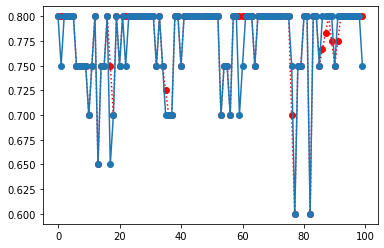

In [ ]:
linear_interpolation_15 = dataset3_mcar_15.interpolate(method='linear')

# Plot imputed data
linear_interpolation_15[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='', marker='o')

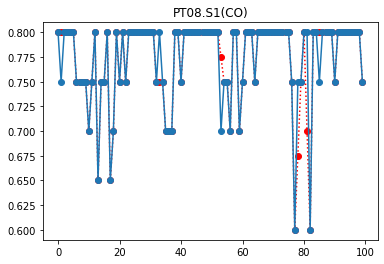

In [ ]:
linear_interpolation_20 = dataset3_mcar_20.interpolate(method='linear')

# Plot imputed data
linear_interpolation_20[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='PT08.S1(CO)', marker='o')

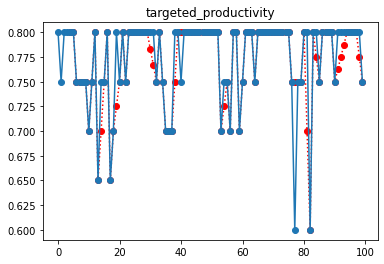

In [ ]:
linear_interpolation_25 = dataset3_mcar_25.interpolate(method='linear')

# Plot imputed data
linear_interpolation_25[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

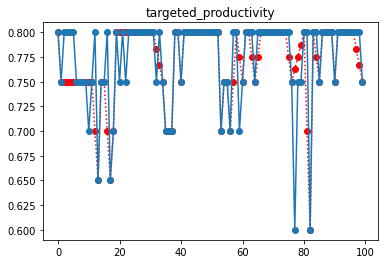

In [ ]:
linear_interpolation_30 = dataset3_mcar_30.interpolate(method='linear')

# Plot imputed data
linear_interpolation_30[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

# Forward fill and Backward fill

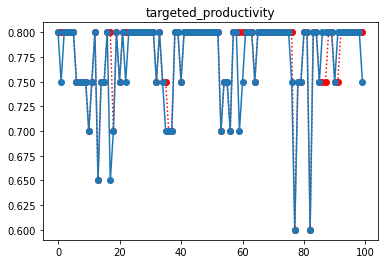

In [ ]:
# Ffill imputation
ffill_imputation_15_3 = dataset3_mcar_15.fillna(method='ffill')

# Plot imputed data
ffill_imputation_15_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')


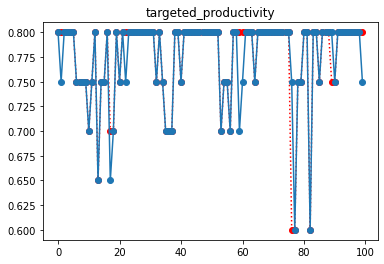

In [ ]:
bfill_imputation_15_3 = dataset3_mcar_15.fillna(method='bfill')

# Plot imputed data
bfill_imputation_15_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

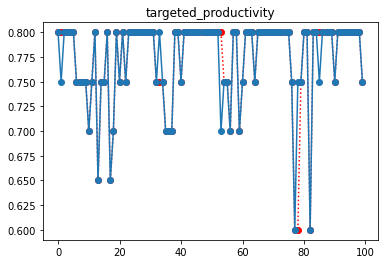

In [ ]:
ffill_imputation_20_3 = dataset3_mcar_20.fillna(method='ffill')

# Plot imputed data
ffill_imputation_20_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

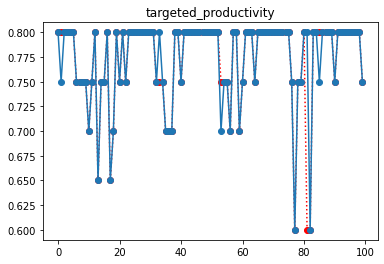

In [ ]:
bfill_imputation_20_3 = dataset3_mcar_20.fillna(method='bfill')

# Plot imputed data
bfill_imputation_20_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

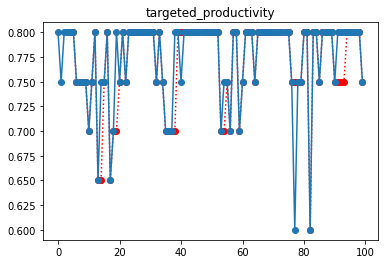

In [ ]:
ffill_imputation_25_3 = dataset3_mcar_25.fillna(method='ffill')

# Plot imputed data
ffill_imputation_25_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

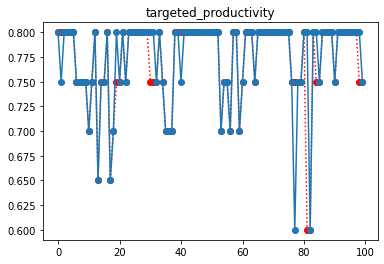

In [ ]:
bfill_imputation_25_3 = dataset3_mcar_25.fillna(method='bfill')

# Plot imputed data
bfill_imputation_25_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

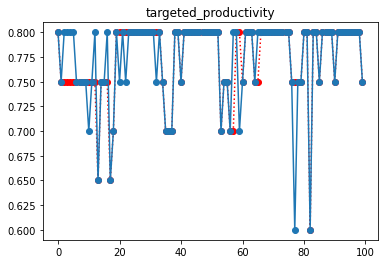

In [ ]:
ffill_imputation_30_3 = dataset3_mcar_30.fillna(method='ffill')

# Plot imputed data
ffill_imputation_30_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

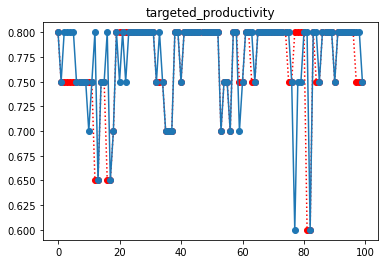

In [ ]:
bfill_imputation_30_3 = dataset3_mcar_30.fillna(method='bfill')

# Plot imputed data
bfill_imputation_30_3[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_3['targeted_productivity'][:100].plot(title='targeted_productivity', marker='o')

In [ ]:
dataset_3 = dataset_3_continous.copy()

In [ ]:
Mean_abs_percentage_30 = MAPE(dataset_3,dataset3_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MAPE(dataset_3,dataset3_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MAPE(dataset_3,dataset3_itr_mcar_30)
Rand_abs_percentage_30 = MAPE(dataset_3,dataset3_rand_mcar_30)
knn_abs_percentage_30 = MAPE(dataset_3,dataset_3_knn_imputed_30)
Intp_abs_percentage_30 = MAPE(dataset_3,linear_interpolation_30.fillna(0))
ffill_abs_percentage_30 = MAPE(dataset_3,ffill_imputation_30_3.fillna(0))
bfill_abs_percentage_30 = MAPE(dataset_3,bfill_imputation_30_3.fillna(0))

Mean_abs_percentage_15 = MAPE(dataset_3,dataset3_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MAPE(dataset_3,dataset3_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MAPE(dataset_3,dataset3_itr_mcar_15)
Rand_abs_percentage_15 = MAPE(dataset_3,dataset3_rand_mcar_15)
knn_abs_percentage_15 = MAPE(dataset_3,dataset_3_knn_imputed_15)
Intp_abs_percentage_15 = MAPE(dataset_3,linear_interpolation_15.fillna(0))
ffill_abs_percentage_15 = MAPE(dataset_3,ffill_imputation_15_3.fillna(0))
bfill_abs_percentage_15 = MAPE(dataset_3,bfill_imputation_15_3.fillna(0))

Mean_abs_percentage_20 = MAPE(dataset_3,dataset3_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MAPE(dataset_3,dataset3_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MAPE(dataset_3,dataset3_itr_mcar_20)
Rand_abs_percentage_20 = MAPE(dataset_3,dataset3_rand_mcar_20)
knn_abs_percentage_20 = MAPE(dataset_3,dataset_3_knn_imputed_20)
Intp_abs_percentage_20 = MAPE(dataset_3,linear_interpolation_20.fillna(0))
ffill_abs_percentage_20 = MAPE(dataset_3,ffill_imputation_20_3.fillna(0))
bfill_abs_percentage_20 = MAPE(dataset_3,bfill_imputation_20_3.fillna(0))

Mean_abs_percentage_25 = MAPE(dataset_3,dataset3_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MAPE(dataset_3,dataset3_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MAPE(dataset_3,dataset3_itr_mcar_25)
Rand_abs_percentage_25 = MAPE(dataset_3,dataset3_rand_mcar_25)
knn_abs_percentage_25 = MAPE(dataset_3,dataset_3_knn_imputed_25)
Intp_abs_percentage_25 = MAPE(dataset_3,linear_interpolation_25.fillna(0))
ffill_abs_percentage_25 = MAPE(dataset_3,ffill_imputation_25_3.fillna(0))
bfill_abs_percentage_25 = MAPE(dataset_3,bfill_imputation_25_3.fillna(0))

print("MAPE FOR DATASET3 30% MISSING - Mean",Mean_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - Mode",Mode_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - KNN",knn_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MAPE FOR DATASET3 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MAPE FOR DATASET3 20% MISSING - Mean",Mean_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - Mode",Mode_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - KNN",knn_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MAPE FOR DATASET3 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MAPE FOR DATASET3 25% MISSING - Mean",Mean_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - Mode",Mode_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - KNN",knn_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MAPE FOR DATASET3 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MAPE FOR DATASET3 15% MISSING - Mean",Mean_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - Mode",Mode_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - KNN",knn_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MAPE FOR DATASET3 15% MISSING - BackwardFill",bfill_abs_percentage_15)


MAPE FOR DATASET3 30% MISSING - Mean 0.24808075145843572
MAPE FOR DATASET3 30% MISSING - Mode 0.13187084172789015
MAPE FOR DATASET3 30% MISSING - Iterative Imp 0.15538957305638737
MAPE FOR DATASET3 30% MISSING - Ensemble Trees 0.12055033481215875
MAPE FOR DATASET3 30% MISSING - KNN 0.18275985474053877
MAPE FOR DATASET3 30% MISSING - Interpolation 0.22704746285491342
MAPE FOR DATASET3 30% MISSING - ForwardFill 0.24746518147124763
MAPE FOR DATASET3 30% MISSING - BackwardFill 0.24526722520392646
MAPE FOR DATASET3 20% MISSING - Mean 0.2249315386963649
MAPE FOR DATASET3 20% MISSING - Mode 0.09047477814705393
MAPE FOR DATASET3 20% MISSING - Iterative Imp 0.09646016803534274
MAPE FOR DATASET3 20% MISSING - Ensemble Trees 0.07877879423866796
MAPE FOR DATASET3 20% MISSING - KNN 0.11239289627281138
MAPE FOR DATASET3 20% MISSING - Interpolation 0.15165127989915225
MAPE FOR DATASET3 20% MISSING - ForwardFill 0.16091894307389182
MAPE FOR DATASET3 20% MISSING - BackwardFill 0.16345411093928994
MAPE 

In [ ]:
Mean_abs_percentage_30 = MAE(dataset_3,dataset3_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MAE(dataset_3,dataset3_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MAE(dataset_3,dataset3_itr_mcar_30)
Rand_abs_percentage_30 = MAE(dataset_3,dataset3_rand_mcar_30)
knn_abs_percentage_30 = MAE(dataset_3,dataset_3_knn_imputed_30)
Intp_abs_percentage_30 = MAE(dataset_3,linear_interpolation_30.fillna(0))
ffill_abs_percentage_30 = MAE(dataset_3,ffill_imputation_30_3.fillna(0))
bfill_abs_percentage_30 = MAE(dataset_3,bfill_imputation_30_3.fillna(0))

Mean_abs_percentage_15 = MAE(dataset_3,dataset3_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MAE(dataset_3,dataset3_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MAE(dataset_3,dataset3_itr_mcar_15)
Rand_abs_percentage_15 = MAE(dataset_3,dataset3_rand_mcar_15)
knn_abs_percentage_15 = MAE(dataset_3,dataset_3_knn_imputed_15)
Intp_abs_percentage_15 = MAE(dataset_3,linear_interpolation_15.fillna(0))
ffill_abs_percentage_15 = MAE(dataset_3,ffill_imputation_15_3.fillna(0))
bfill_abs_percentage_15 = MAE(dataset_3,bfill_imputation_15_3.fillna(0))

Mean_abs_percentage_20 = MAE(dataset_3,dataset3_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MAE(dataset_3,dataset3_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MAE(dataset_3,dataset3_itr_mcar_20)
Rand_abs_percentage_20 = MAE(dataset_3,dataset3_rand_mcar_20)
knn_abs_percentage_20 = MAE(dataset_3,dataset_3_knn_imputed_20)
Intp_abs_percentage_20 = MAE(dataset_3,linear_interpolation_20.fillna(0))
ffill_abs_percentage_20 = MAE(dataset_3,ffill_imputation_20_3.fillna(0))
bfill_abs_percentage_20 = MAE(dataset_3,bfill_imputation_20_3.fillna(0))

Mean_abs_percentage_25 = MAE(dataset_3,dataset3_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MAE(dataset_3,dataset3_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MAE(dataset_3,dataset3_itr_mcar_25)
Rand_abs_percentage_25 = MAE(dataset_3,dataset3_rand_mcar_25)
knn_abs_percentage_25 = MAE(dataset_3,dataset_3_knn_imputed_25)
Intp_abs_percentage_25 = MAE(dataset_3,linear_interpolation_25.fillna(0))
ffill_abs_percentage_25 = MAE(dataset_3,ffill_imputation_25_3.fillna(0))
bfill_abs_percentage_25 = MAE(dataset_3,bfill_imputation_25_3.fillna(0))

print("MAE FOR DATASET3 30% MISSING - Mean",Mean_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - Mode",Mode_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - KNN",knn_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MAE FOR DATASET3 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MAE FOR DATASET3 20% MISSING - Mean",Mean_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - Mode",Mode_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - KNN",knn_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MAE FOR DATASET3 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MAE FOR DATASET3 25% MISSING - Mean",Mean_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - Mode",Mode_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - KNN",knn_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MAE FOR DATASET3 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MAE FOR DATASET3 15% MISSING - Mean",Mean_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - Mode",Mode_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - KNN",knn_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MAE FOR DATASET3 15% MISSING - BackwardFill",bfill_abs_percentage_15)


MAE FOR DATASET3 30% MISSING - Mean 2.130854527852608
MAE FOR DATASET3 30% MISSING - Mode 2.7595365579860185
MAE FOR DATASET3 30% MISSING - Iterative Imp 1.2018362125533166
MAE FOR DATASET3 30% MISSING - Ensemble Trees 0.7792203120218398
MAE FOR DATASET3 30% MISSING - KNN 1.5699474817011796
MAE FOR DATASET3 30% MISSING - Interpolation 2.0687933626178334
MAE FOR DATASET3 30% MISSING - ForwardFill 2.2676820671796785
MAE FOR DATASET3 30% MISSING - BackwardFill 2.3136216450310183
MAE FOR DATASET3 20% MISSING - Mean 1.7483427677709042
MAE FOR DATASET3 20% MISSING - Mode 1.7410647003216901
MAE FOR DATASET3 20% MISSING - Iterative Imp 0.6888168999178806
MAE FOR DATASET3 20% MISSING - Ensemble Trees 0.4587433423062242
MAE FOR DATASET3 20% MISSING - KNN 0.8884379829820295
MAE FOR DATASET3 20% MISSING - Interpolation 1.3397095044796636
MAE FOR DATASET3 20% MISSING - ForwardFill 1.4596424668985002
MAE FOR DATASET3 20% MISSING - BackwardFill 1.477176653245114
MAE FOR DATASET3 25% MISSING - Mean 1.

In [ ]:
Mean_abs_percentage_30 = MSE(dataset_3,dataset3_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MSE(dataset_3,dataset3_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MSE(dataset_3,dataset3_itr_mcar_30)
Rand_abs_percentage_30 = MSE(dataset_3,dataset3_rand_mcar_30)
knn_abs_percentage_30 = MSE(dataset_3,dataset_3_knn_imputed_30)
Intp_abs_percentage_30 = MSE(dataset_3,linear_interpolation_30.fillna(0))
ffill_abs_percentage_30 = MSE(dataset_3,ffill_imputation_30_3.fillna(0))
bfill_abs_percentage_30 = MAE(dataset_3,bfill_imputation_30_3.fillna(0))

Mean_abs_percentage_15 = MSE(dataset_3,dataset3_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MSE(dataset_3,dataset3_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MSE(dataset_3,dataset3_itr_mcar_15)
Rand_abs_percentage_15 = MSE(dataset_3,dataset3_rand_mcar_15)
knn_abs_percentage_15 = MSE(dataset_3,dataset_3_knn_imputed_15)
Intp_abs_percentage_15 = MSE(dataset_3,linear_interpolation_15.fillna(0))
ffill_abs_percentage_15 = MSE(dataset_3,ffill_imputation_15_3.fillna(0))
bfill_abs_percentage_15 = MSE(dataset_3,bfill_imputation_15_3.fillna(0))

Mean_abs_percentage_20 = MSE(dataset_3,dataset3_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MSE(dataset_3,dataset3_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MSE(dataset_3,dataset3_itr_mcar_20)
Rand_abs_percentage_20 = MSE(dataset_3,dataset3_rand_mcar_20)
knn_abs_percentage_20 = MSE(dataset_3,dataset_3_knn_imputed_20)
Intp_abs_percentage_20 = MSE(dataset_3,linear_interpolation_20.fillna(0))
ffill_abs_percentage_20 = MSE(dataset_3,ffill_imputation_20_3.fillna(0))
bfill_abs_percentage_20 = MSE(dataset_3,bfill_imputation_20_3.fillna(0))

Mean_abs_percentage_25 = MSE(dataset_3,dataset3_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MSE(dataset_3,dataset3_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MSE(dataset_3,dataset3_itr_mcar_25)
Rand_abs_percentage_25 = MSE(dataset_3,dataset3_rand_mcar_25)
knn_abs_percentage_25 = MSE(dataset_3,dataset_3_knn_imputed_25)
Intp_abs_percentage_25 = MSE(dataset_3,linear_interpolation_25.fillna(0))
ffill_abs_percentage_25 = MSE(dataset_3,ffill_imputation_25_3.fillna(0))
bfill_abs_percentage_25 = MSE(dataset_3,bfill_imputation_25_3.fillna(0))

print("MSE FOR DATASET3 30% MISSING - Mean",Mean_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - Mode",Mode_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - KNN",knn_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MSE FOR DATASET3 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MSE FOR DATASET3 20% MISSING - Mean",Mean_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - Mode",Mode_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - KNN",knn_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MSE FOR DATASET3 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MSE FOR DATASET3 25% MISSING - Mean",Mean_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - Mode",Mode_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - KNN",knn_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MSE FOR DATASET3 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MSE FOR DATASET3 15% MISSING - Mean",Mean_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - Mode",Mode_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - KNN",knn_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MSE FOR DATASET3 15% MISSING - BackwardFill",bfill_abs_percentage_15)


MSE FOR DATASET3 30% MISSING - Mean 39.234790775062855
MSE FOR DATASET3 30% MISSING - Mode 97.12345369286419
MSE FOR DATASET3 30% MISSING - Iterative Imp 16.50504312527512
MSE FOR DATASET3 30% MISSING - Ensemble Trees 16.285316941806293
MSE FOR DATASET3 30% MISSING - KNN 27.67722952207299
MSE FOR DATASET3 30% MISSING - Interpolation 49.13947538834482
MSE FOR DATASET3 30% MISSING - ForwardFill 69.13325276731676
MSE FOR DATASET3 30% MISSING - BackwardFill 2.3136216450310183
MSE FOR DATASET3 20% MISSING - Mean 31.45115197452592
MSE FOR DATASET3 20% MISSING - Mode 61.2467247455751
MSE FOR DATASET3 20% MISSING - Iterative Imp 8.991450937687793
MSE FOR DATASET3 20% MISSING - Ensemble Trees 10.51381004434551
MSE FOR DATASET3 20% MISSING - KNN 14.117497344533811
MSE FOR DATASET3 20% MISSING - Interpolation 32.356855990363734
MSE FOR DATASET3 20% MISSING - ForwardFill 43.73315157168797
MSE FOR DATASET3 20% MISSING - BackwardFill 44.479580728722375
MSE FOR DATASET3 25% MISSING - Mean 31.45115197

# Dataset - 4

In [ ]:
dataset_4 = pd.read_csv('Occupancy_Estimation.csv')

In [ ]:
dataset_4.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
dataset_4.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
(dataset_4 == 0).any(axis=0)

Date                    False
Time                    False
S1_Temp                 False
S2_Temp                 False
S3_Temp                 False
S4_Temp                 False
S1_Light                 True
S2_Light                 True
S3_Light                 True
S4_Light                 True
S1_Sound                False
S2_Sound                False
S3_Sound                False
S4_Sound                False
S5_CO2                  False
S5_CO2_Slope             True
S6_PIR                   True
S7_PIR                   True
Room_Occupancy_Count     True
dtype: bool

In [ ]:
dataset_4.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [ ]:
dataset_4_continous = dataset_4[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound']]

In [ ]:
dataset_4_continous.shape

(10129, 8)

In [ ]:
dataset_4_continous =  np.array(dataset_4_continous)

# MCAR mechanism with different missing rates

## 15% missing rate with MCAR mechanism

In [ ]:
dataset4_miss_mcar = produce_NA(dataset_4_continous, p_miss=0.15, mecha="MCAR")


In [ ]:
dataset4_mcar = dataset4_miss_mcar['X_incomp']
Miss_15_4 = pd.DataFrame(dataset4_miss_mcar['mask'])

In [ ]:
dataset4_mcar = dataset4_mcar.numpy()

In [ ]:
dataset4_mcar_15 = pd.DataFrame(dataset4_mcar)


In [ ]:
dataset4_mcar_15.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7
0,24.940001,24.750000,24.559999,25.379999,0.080000,0.190000,0.060000,0.060000
1,24.940001,24.750000,24.559999,25.440001,0.930000,0.050000,0.060000,0.060000
2,25.000000,24.750000,24.500000,nan,0.430000,0.110000,nan,0.060000
3,25.000000,24.750000,24.559999,25.440001,0.410000,nan,0.100000,0.090000
4,25.000000,24.750000,24.559999,nan,0.180000,nan,0.060000,0.060000


## 20% missing rate with MCAR mechanism

In [ ]:
dataset4_miss_mcar_20 = produce_NA(dataset_4_continous, p_miss=0.20, mecha="MCAR")
dataset4_mcar_15 = pd.DataFrame(dataset4_mcar).head().style.highlight_null(null_color='orange')

In [ ]:
dataset4_mcar_20 = dataset4_miss_mcar_20['X_incomp']

In [ ]:
dataset4_mcar_20_np = dataset4_mcar_20.numpy()

In [ ]:
dataset4_mcar_20 = pd.DataFrame(dataset4_mcar_20_np)

In [ ]:
dataset4_mcar_20.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7
0,nan,24.750000,nan,25.379999,0.080000,nan,0.060000,0.060000
1,24.940001,24.750000,nan,25.440001,0.930000,0.050000,0.060000,nan
2,nan,24.750000,24.500000,25.440001,0.430000,nan,0.080000,0.060000
3,25.000000,24.750000,24.559999,nan,0.410000,nan,nan,0.090000
4,25.000000,24.750000,24.559999,25.440001,0.180000,0.060000,0.060000,0.060000


## 25% missing rate using MCAR mechanism

In [ ]:
dataset4_miss_mcar_25 = produce_NA(dataset_4_continous, p_miss=0.25, mecha="MCAR")


In [ ]:
dataset4_mcar_25 = dataset4_miss_mcar_25['X_incomp']

In [ ]:
dataset4_mcar_25_np = dataset4_mcar_25.numpy()

In [ ]:
dataset4_mcar_25 = pd.DataFrame(dataset4_mcar_25_np)

In [ ]:
dataset4_mcar_25.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7
0,24.940001,24.750000,24.559999,25.379999,0.080000,nan,0.060000,nan
1,nan,24.750000,24.559999,25.440001,0.930000,0.050000,0.060000,0.060000
2,nan,24.750000,24.500000,nan,0.430000,nan,0.080000,0.060000
3,25.000000,24.750000,24.559999,25.440001,0.410000,nan,nan,0.090000
4,nan,24.750000,24.559999,25.440001,nan,0.060000,0.060000,0.060000


In [ ]:
dataset4_miss_mcar_30 = produce_NA(dataset_4_continous, p_miss=0.30, mecha="MCAR")


In [ ]:
dataset4_mcar_30 = dataset4_miss_mcar_30['X_incomp']

In [ ]:
dataset4_mcar_30_np = dataset4_mcar_30.numpy()

In [ ]:
dataset4_mcar_30 = pd.DataFrame(dataset4_mcar_30_np)

In [ ]:
dataset4_mcar_30.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6,7
0,24.940001,24.750000,24.559999,25.379999,0.080000,nan,0.060000,0.060000
1,24.940001,nan,24.559999,25.440001,0.930000,0.050000,0.060000,0.060000
2,25.000000,24.750000,24.500000,25.440001,0.430000,0.110000,0.080000,0.060000
3,25.000000,24.750000,24.559999,25.440001,0.410000,0.100000,0.100000,0.090000
4,25.000000,24.750000,24.559999,25.440001,0.180000,nan,nan,nan


# Imputation method - Different mechanism - Dataset-4 - Garments Worker productivity


## Mean Imputation

## MCAR mechanism with different missing rates-

In [ ]:
dataset4_mean_mcar_15 = SimpleImputer().fit_transform(dataset4_mcar)
dataset4_mean_mcar_20 = SimpleImputer().fit_transform(dataset4_mcar_20_np)
dataset4_mean_mcar_25 = SimpleImputer().fit_transform(dataset4_mcar_25_np)
dataset4_mean_mcar_30 = SimpleImputer().fit_transform(dataset4_mcar_30)
dataset4_mean_mcar_15 = pd.DataFrame(dataset4_mean_mcar_15)
dataset4_mean_mcar_20 = pd.DataFrame(dataset4_mean_mcar_20)
dataset4_mean_mcar_20 = pd.DataFrame(dataset4_mean_mcar_25)
dataset4_mean_mcar_30 = pd.DataFrame(dataset4_mean_mcar_30)



## Mode Imputation

In [ ]:
dataset4_mode_mcar_15 = SimpleImputer(strategy='most_frequent').fit_transform(dataset4_mcar)
dataset4_mode_mcar_20 = SimpleImputer(strategy='most_frequent').fit_transform(dataset4_mcar_20_np)
dataset4_mode_mcar_25 = SimpleImputer(strategy='most_frequent').fit_transform(dataset4_mcar_25_np)
dataset4_mode_mcar_30 = SimpleImputer(strategy='most_frequent').fit_transform(dataset4_mcar_30_np)
dataset4_mode_mcar_15 = pd.DataFrame(dataset4_mode_mcar_15)
dataset4_mode_mcar_20 = pd.DataFrame(dataset4_mode_mcar_20)
dataset4_mode_mcar_25 = pd.DataFrame(dataset4_mode_mcar_25)
dataset4_mode_mcar_30 = pd.DataFrame(dataset4_mode_mcar_30)



# Iterative Imputer with Bayesian Ridge and Ensemble tree:

## Bayesian

In [ ]:
dataset4_itr_mcar_15 = IterativeImputer().fit_transform(dataset4_mcar)
dataset4_itr_mcar_20 = IterativeImputer().fit_transform(dataset4_mcar_20_np)
dataset4_itr_mcar_25 = IterativeImputer().fit_transform(dataset4_mcar_25_np)
dataset4_itr_mcar_30 = IterativeImputer().fit_transform(dataset4_mcar_30_np)
dataset4_itr_mcar_15 = pd.DataFrame(dataset4_itr_mcar_15)
dataset4_itr_mcar_20 = pd.DataFrame(dataset4_itr_mcar_20)
dataset4_itr_mcar_25 = pd.DataFrame(dataset4_itr_mcar_25)
dataset4_itr_mcar_30 = pd.DataFrame(dataset4_itr_mcar_30)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


# Ensemble Tree - RandomForest

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
rf = ExtraTreesRegressor(n_estimators=10, random_state=0)

In [ ]:
dataset4_rand_mcar_15 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset4_mcar)
dataset4_rand_mcar_20 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset4_mcar_20_np)
dataset4_rand_mcar_25 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset4_mcar_25_np)
dataset4_rand_mcar_30 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset4_mcar_30_np)
dataset4_rand_mcar_15 = pd.DataFrame(dataset4_rand_mcar_15)
dataset4_rand_mcar_20 = pd.DataFrame(dataset4_rand_mcar_20)
dataset4_rand_mcar_25 = pd.DataFrame(dataset4_rand_mcar_25)
dataset4_rand_mcar_30 = pd.DataFrame(dataset4_rand_mcar_30)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


# KNN Imputer for MCAR mechanism - Different missing rates

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn_15_4 = dataset4_mcar.copy()
df_knn_20_4 = dataset4_mcar_20_np.copy()
df_knn_25_4 = dataset4_mcar_25_np.copy()
df_knn_30_4 = dataset4_mcar_30_np.copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn_15_4 = pd.DataFrame(scaler.fit_transform(df_knn_15_4))
df_knn_20_4 = pd.DataFrame(scaler.fit_transform(df_knn_20_4))
df_knn_25_4 = pd.DataFrame(scaler.fit_transform(df_knn_25_4))
df_knn_30_4 = pd.DataFrame(scaler.fit_transform(df_knn_30_4))

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
dataset_4_knn_imputed_15 = pd.DataFrame(knn_imputer.fit_transform(df_knn_15_4))
dataset_4_knn_imputed_20 = pd.DataFrame(knn_imputer.fit_transform(df_knn_20_4))
dataset_4_knn_imputed_25 = pd.DataFrame(knn_imputer.fit_transform(df_knn_25_4))
dataset_4_knn_imputed_30 = pd.DataFrame(knn_imputer.fit_transform(df_knn_30_4))

In [ ]:
dataset_4_knn_imputed_15 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_15_4)))
dataset_4_knn_imputed_20 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_20_4)))
dataset_4_knn_imputed_25 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_25_4)))
dataset_4_knn_imputed_30 = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(df_knn_30_4)))


# Interpolation using - Linear Interpolation

In [ ]:
dataset4_mcar_15 = pd.DataFrame(dataset4_mcar)
dataset4_mcar_20 = pd.DataFrame(dataset4_mcar_20_np)
dataset4_mcar_25 = pd.DataFrame(dataset4_mcar_25_np)
dataset4_mcar_30 = pd.DataFrame(dataset4_mcar_30_np)

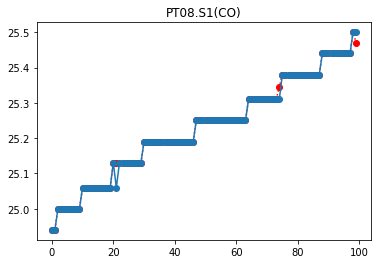

In [ ]:
linear_interpolation_15_4 = dataset4_mcar_15.interpolate(method='linear')

# Plot imputed data
linear_interpolation_15_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='PT08.S1(CO)', marker='o')

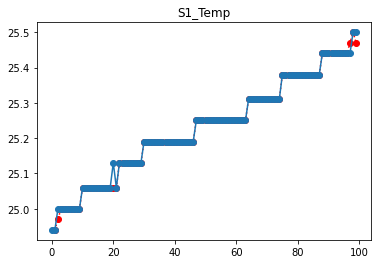

In [ ]:
linear_interpolation_20_4 = dataset4_mcar_20.interpolate(method='linear')

# Plot imputed data
linear_interpolation_20_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

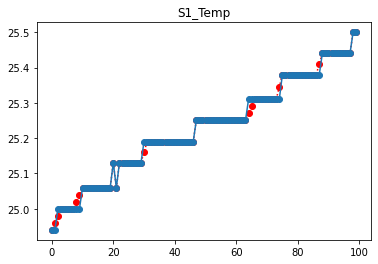

In [ ]:
linear_interpolation_25_4 = dataset4_mcar_25.interpolate(method='linear')

# Plot imputed data
linear_interpolation_25_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

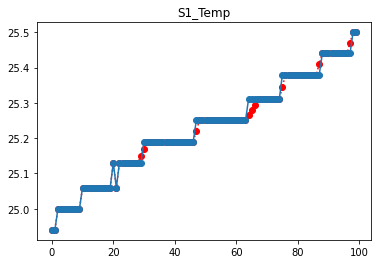

In [ ]:
linear_interpolation_30_4 = dataset4_mcar_30.interpolate(method='linear')

# Plot imputed data
linear_interpolation_30_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

# Forward fill and Backward fill

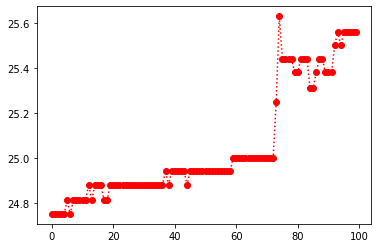

In [ ]:
# Ffill imputation
ffill_imputation_15_4 = dataset4_mcar_15.fillna(method='ffill')

# Plot imputed data
ffill_imputation_15_4[1][:100].plot(color='red', marker='o', linestyle='dotted')
#dataset_4['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')


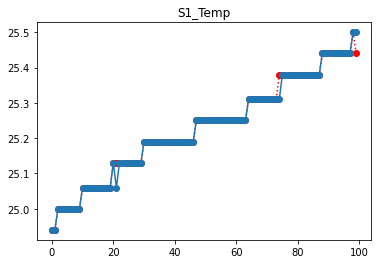

In [ ]:
bfill_imputation_15_4 = dataset4_mcar_15.fillna(method='bfill')

# Plot imputed data
bfill_imputation_15_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

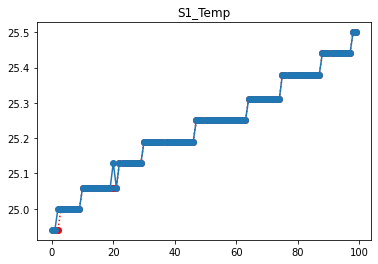

In [ ]:
ffill_imputation_20_4 = dataset4_mcar_20.fillna(method='ffill')

# Plot imputed data
ffill_imputation_20_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

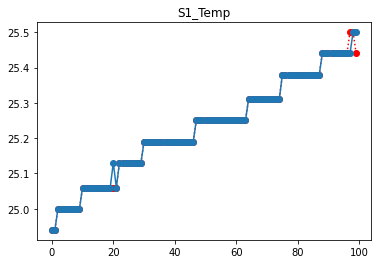

In [ ]:
bfill_imputation_20_4 = dataset4_mcar_20.fillna(method='bfill')

# Plot imputed data
bfill_imputation_20_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

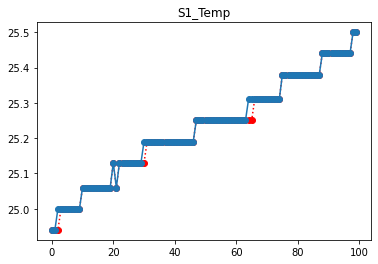

In [ ]:
ffill_imputation_25_4 = dataset4_mcar_25.fillna(method='ffill')

# Plot imputed data
ffill_imputation_25_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

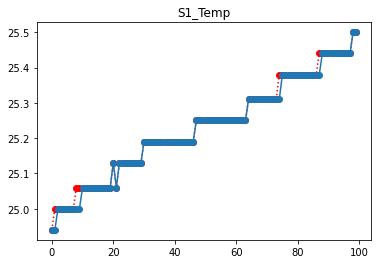

In [ ]:
bfill_imputation_25_4 = dataset4_mcar_25.fillna(method='bfill')

# Plot imputed data
bfill_imputation_25_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

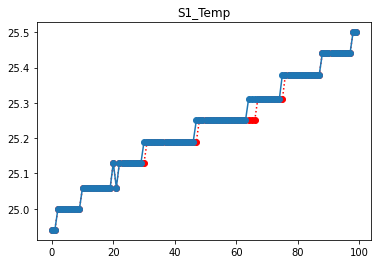

In [ ]:
ffill_imputation_30_4 = dataset4_mcar_30.fillna(method='ffill')

# Plot imputed data
ffill_imputation_30_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

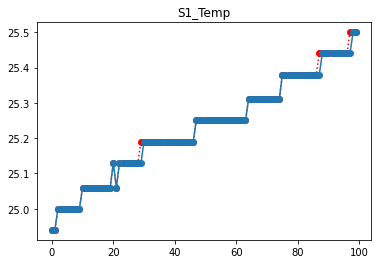

In [ ]:
bfill_imputation_30_4 = dataset4_mcar_30.fillna(method='bfill')

# Plot imputed data
bfill_imputation_30_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
dataset_4 = dataset_4_continous.copy()

In [ ]:
Mean_abs_percentage_30 = MAPE(dataset_4,dataset4_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MAPE(dataset_4,dataset4_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MAPE(dataset_4,dataset4_itr_mcar_30)
Rand_abs_percentage_30 = MAPE(dataset_4,dataset4_rand_mcar_30)
knn_abs_percentage_30 = MAPE(dataset_4,dataset_4_knn_imputed_30)
Intp_abs_percentage_30 = MAPE(dataset_4,linear_interpolation_30_4.fillna(0))
ffill_abs_percentage_30 = MAPE(dataset_4,ffill_imputation_30_4.fillna(0))
bfill_abs_percentage_30 = MAPE(dataset_4,bfill_imputation_30_4.fillna(0))

Mean_abs_percentage_15 = MAPE(dataset_4,dataset4_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MAPE(dataset_4,dataset4_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MAPE(dataset_4,dataset4_itr_mcar_15)
Rand_abs_percentage_15 = MAPE(dataset_4,dataset4_rand_mcar_15)
knn_abs_percentage_15 = MAPE(dataset_4,dataset_4_knn_imputed_15)
Intp_abs_percentage_15 = MAPE(dataset_4,linear_interpolation_15_4.fillna(0))
ffill_abs_percentage_15 = MAPE(dataset_4,ffill_imputation_15_4.fillna(0))
bfill_abs_percentage_15 = MAPE(dataset_4,bfill_imputation_15_4.fillna(0))

Mean_abs_percentage_20 = MAPE(dataset_4,dataset4_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MAPE(dataset_4,dataset4_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MAPE(dataset_4,dataset4_itr_mcar_20)
Rand_abs_percentage_20 = MAPE(dataset_4,dataset4_rand_mcar_20)
knn_abs_percentage_20 = MAPE(dataset_4,dataset_4_knn_imputed_20)
Intp_abs_percentage_20 = MAPE(dataset_4,linear_interpolation_20_4.fillna(0))
ffill_abs_percentage_20 = MAPE(dataset_4,ffill_imputation_20_4.fillna(0))
bfill_abs_percentage_20 = MAPE(dataset_4,bfill_imputation_20_4.fillna(0))

Mean_abs_percentage_25 = MAPE(dataset_4,dataset4_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MAPE(dataset_4,dataset4_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MAPE(dataset_4,dataset4_itr_mcar_25)
Rand_abs_percentage_25 = MAPE(dataset_4,dataset4_rand_mcar_25)
knn_abs_percentage_25 = MAPE(dataset_4,dataset_4_knn_imputed_25)
Intp_abs_percentage_25 = MAPE(dataset_4,linear_interpolation_25_4.fillna(0))
ffill_abs_percentage_25 = MAPE(dataset_4,ffill_imputation_25_4.fillna(0))
bfill_abs_percentage_25 = MAPE(dataset_4,bfill_imputation_25_4.fillna(0))

print("MAPE FOR DATASET4 30% MISSING - Mean",Mean_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - Mode",Mode_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - KNN",knn_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MAPE FOR DATASET4 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MAPE FOR DATASET4 20% MISSING - Mean",Mean_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - Mode",Mode_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - KNN",knn_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MAPE FOR DATASET4 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MAPE FOR DATASET4 25% MISSING - Mean",Mean_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - Mode",Mode_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - KNN",knn_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MAPE FOR DATASET4 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MAPE FOR DATASET4 15% MISSING - Mean",Mean_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - Mode",Mode_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - KNN",knn_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MAPE FOR DATASET4 15% MISSING - BackwardFill",bfill_abs_percentage_15)


MAPE FOR DATASET4 30% MISSING - Mean 0.16662452754770601
MAPE FOR DATASET4 30% MISSING - Mode 0.032553991054137095
MAPE FOR DATASET4 30% MISSING - Iterative Imp 0.11383199614484665
MAPE FOR DATASET4 30% MISSING - Ensemble Trees 0.046271970085881256
MAPE FOR DATASET4 30% MISSING - KNN 0.05175022054773493
MAPE FOR DATASET4 30% MISSING - Interpolation 0.04135378132256598
MAPE FOR DATASET4 30% MISSING - ForwardFill 0.04453786673682697
MAPE FOR DATASET4 30% MISSING - BackwardFill 0.044318034761906266
MAPE FOR DATASET4 20% MISSING - Mean 0.13813612154320773
MAPE FOR DATASET4 20% MISSING - Mode 0.022302771681412998
MAPE FOR DATASET4 20% MISSING - Iterative Imp 0.06020720426213277
MAPE FOR DATASET4 20% MISSING - Ensemble Trees 0.02916789738894885
MAPE FOR DATASET4 20% MISSING - KNN 0.04355913439495022
MAPE FOR DATASET4 20% MISSING - Interpolation 0.031312264577509887
MAPE FOR DATASET4 20% MISSING - ForwardFill 0.03423735382775901
MAPE FOR DATASET4 20% MISSING - BackwardFill 0.03347548137153116

In [ ]:
Mean_abs_percentage_30 = MAE(dataset_4,dataset4_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MAE(dataset_4,dataset4_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MAE(dataset_4,dataset4_itr_mcar_30)
Rand_abs_percentage_30 = MAE(dataset_4,dataset4_rand_mcar_30)
knn_abs_percentage_30 = MAE(dataset_4,dataset_4_knn_imputed_30)
Intp_abs_percentage_30 = MAE(dataset_4,linear_interpolation_30_4.fillna(0))
ffill_abs_percentage_30 = MAE(dataset_4,ffill_imputation_30_4.fillna(0))
bfill_abs_percentage_30 = MAE(dataset_4,bfill_imputation_30_4.fillna(0))

Mean_abs_percentage_15 = MAE(dataset_4,dataset4_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MAE(dataset_4,dataset4_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MAE(dataset_4,dataset4_itr_mcar_15)
Rand_abs_percentage_15 = MAE(dataset_4,dataset4_rand_mcar_15)
knn_abs_percentage_15 = MAE(dataset_4,dataset_4_knn_imputed_15)
Intp_abs_percentage_15 = MAE(dataset_4,linear_interpolation_15_4.fillna(0))
ffill_abs_percentage_15 = MAE(dataset_4,ffill_imputation_15_4.fillna(0))
bfill_abs_percentage_15 = MAE(dataset_4,bfill_imputation_15_4.fillna(0))

Mean_abs_percentage_20 = MAE(dataset_4,dataset4_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MAE(dataset_4,dataset4_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MAE(dataset_4,dataset4_itr_mcar_20)
Rand_abs_percentage_20 = MAE(dataset_4,dataset4_rand_mcar_20)
knn_abs_percentage_20 = MAE(dataset_4,dataset_4_knn_imputed_20)
Intp_abs_percentage_20 = MAE(dataset_4,linear_interpolation_20_4.fillna(0))
ffill_abs_percentage_20 = MAE(dataset_4,ffill_imputation_20_4.fillna(0))
bfill_abs_percentage_20 = MAE(dataset_4,bfill_imputation_20_4.fillna(0))

Mean_abs_percentage_25 = MAE(dataset_4,dataset4_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MAE(dataset_4,dataset4_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MAE(dataset_4,dataset4_itr_mcar_25)
Rand_abs_percentage_25 = MAE(dataset_4,dataset4_rand_mcar_25)
knn_abs_percentage_25 = MAE(dataset_4,dataset_4_knn_imputed_25)
Intp_abs_percentage_25 = MAE(dataset_4,linear_interpolation_25_4.fillna(0))
ffill_abs_percentage_25 = MAE(dataset_4,ffill_imputation_25_4.fillna(0))
bfill_abs_percentage_25 = MAE(dataset_4,bfill_imputation_25_4.fillna(0))

print("MAE FOR DATASET4 30% MISSING - Mean",Mean_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - Mode",Mode_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - KNN",knn_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MAE FOR DATASET4 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MAE FOR DATASET4 20% MISSING - Mean",Mean_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - Mode",Mode_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - KNN",knn_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MAE FOR DATASET4 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MAE FOR DATASET4 25% MISSING - Mean",Mean_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - Mode",Mode_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - KNN",knn_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MAE FOR DATASET4 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MAE FOR DATASET4 15% MISSING - Mean",Mean_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - Mode",Mode_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - KNN",knn_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MAE FOR DATASET4 15% MISSING - BackwardFill",bfill_abs_percentage_15)


MAE FOR DATASET4 30% MISSING - Mean 0.06794103569814097
MAE FOR DATASET4 30% MISSING - Mode 0.06525368972012976
MAE FOR DATASET4 30% MISSING - Iterative Imp 0.0342079385240405
MAE FOR DATASET4 30% MISSING - Ensemble Trees 0.020025588756479414
MAE FOR DATASET4 30% MISSING - KNN 0.042074493251836945
MAE FOR DATASET4 30% MISSING - Interpolation 0.011611118642660807
MAE FOR DATASET4 30% MISSING - ForwardFill 0.012999419105422185
MAE FOR DATASET4 30% MISSING - BackwardFill 0.01273421616530816
MAE FOR DATASET4 20% MISSING - Mean 0.05736250058354983
MAE FOR DATASET4 20% MISSING - Mode 0.04479215734989978
MAE FOR DATASET4 20% MISSING - Iterative Imp 0.02092793243550837
MAE FOR DATASET4 20% MISSING - Ensemble Trees 0.012049677777566393
MAE FOR DATASET4 20% MISSING - KNN 0.024214307953321704
MAE FOR DATASET4 20% MISSING - Interpolation 0.009095209317808436
MAE FOR DATASET4 20% MISSING - ForwardFill 0.009959514714956014
MAE FOR DATASET4 20% MISSING - BackwardFill 0.009762185426744178
MAE FOR DATA

In [ ]:
Mean_abs_percentage_30 = MSE(dataset_4,dataset4_mean_mcar_30)  #dataset1_mean_mcar_15
Mode_abs_percentage_30 = MSE(dataset_4,dataset4_mode_mcar_30)  #df_knn_scaled
Itr_abs_percentage_30 = MSE(dataset_4,dataset4_itr_mcar_30)
Rand_abs_percentage_30 = MSE(dataset_4,dataset4_rand_mcar_30)
knn_abs_percentage_30 = MSE(dataset_4,dataset_4_knn_imputed_30)
Intp_abs_percentage_30 = MSE(dataset_4,linear_interpolation_30_4.fillna(0))
ffill_abs_percentage_30 = MSE(dataset_4,ffill_imputation_30_4.fillna(0))
bfill_abs_percentage_30 = MAE(dataset_4,bfill_imputation_30_4.fillna(0))

Mean_abs_percentage_15 = MSE(dataset_4,dataset4_mean_mcar_15)  #dataset1_mean_mcar_15
Mode_abs_percentage_15 = MSE(dataset_4,dataset4_mode_mcar_15)  #df_knn_scaled
Itr_abs_percentage_15 = MSE(dataset_4,dataset4_itr_mcar_15)
Rand_abs_percentage_15 = MSE(dataset_4,dataset4_rand_mcar_15)
knn_abs_percentage_15 = MSE(dataset_4,dataset_4_knn_imputed_15)
Intp_abs_percentage_15 = MSE(dataset_4,linear_interpolation_15_4.fillna(0))
ffill_abs_percentage_15 = MSE(dataset_4,ffill_imputation_15_4.fillna(0))
bfill_abs_percentage_15 = MSE(dataset_4,bfill_imputation_15_4.fillna(0))

Mean_abs_percentage_20 = MSE(dataset_4,dataset4_mean_mcar_20)  #dataset1_mean_mcar_15
Mode_abs_percentage_20 = MSE(dataset_4,dataset4_mode_mcar_20)  #df_knn_scaled
Itr_abs_percentage_20 = MSE(dataset_4,dataset4_itr_mcar_20)
Rand_abs_percentage_20 = MSE(dataset_4,dataset4_rand_mcar_20)
knn_abs_percentage_20 = MSE(dataset_4,dataset_4_knn_imputed_20)
Intp_abs_percentage_20 = MSE(dataset_4,linear_interpolation_20_4.fillna(0))
ffill_abs_percentage_20 = MSE(dataset_4,ffill_imputation_20_4.fillna(0))
bfill_abs_percentage_20 = MSE(dataset_4,bfill_imputation_20_4.fillna(0))

Mean_abs_percentage_25 = MSE(dataset_4,dataset4_mean_mcar_25)  #dataset1_mean_mcar_15
Mode_abs_percentage_25 = MSE(dataset_4,dataset4_mode_mcar_25)  #df_knn_scaled
Itr_abs_percentage_25 = MSE(dataset_4,dataset4_itr_mcar_25)
Rand_abs_percentage_25 = MSE(dataset_4,dataset4_rand_mcar_25)
knn_abs_percentage_25 = MSE(dataset_4,dataset_4_knn_imputed_25)
Intp_abs_percentage_25 = MSE(dataset_4,linear_interpolation_25_4.fillna(0))
ffill_abs_percentage_25 = MSE(dataset_4,ffill_imputation_25_4.fillna(0))
bfill_abs_percentage_25 = MSE(dataset_4,bfill_imputation_25_4.fillna(0))

print("MSE FOR DATASET4 30% MISSING - Mean",Mean_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - Mode",Mode_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - Iterative Imp",Itr_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - Ensemble Trees",Rand_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - KNN",knn_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - Interpolation",Intp_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - ForwardFill",ffill_abs_percentage_30)
print("MSE FOR DATASET4 30% MISSING - BackwardFill",bfill_abs_percentage_30)

print("MSE FOR DATASET4 20% MISSING - Mean",Mean_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - Mode",Mode_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - Iterative Imp",Itr_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - Ensemble Trees",Rand_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - KNN",knn_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - Interpolation",Intp_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - ForwardFill",ffill_abs_percentage_20)
print("MSE FOR DATASET4 20% MISSING - BackwardFill",bfill_abs_percentage_20)

print("MSE FOR DATASET4 25% MISSING - Mean",Mean_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - Mode",Mode_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - Iterative Imp",Itr_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - Ensemble Trees",Rand_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - KNN",knn_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - Interpolation",Intp_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - ForwardFill",ffill_abs_percentage_25)
print("MSE FOR DATASET4 25% MISSING - BackwardFill",bfill_abs_percentage_25)

print("MSE FOR DATASET4 15% MISSING - Mean",Mean_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - Mode",Mode_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - Iterative Imp",Itr_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - Ensemble Trees",Rand_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - KNN",knn_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - Interpolation",Intp_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - ForwardFill",ffill_abs_percentage_15)
print("MSE FOR DATASET4 15% MISSING - BackwardFill",bfill_abs_percentage_15)

MSE FOR DATASET4 30% MISSING - Mean 0.04277623879629353
MSE FOR DATASET4 30% MISSING - Mode 0.053482910515526706
MSE FOR DATASET4 30% MISSING - Iterative Imp 0.016724027665481866
MSE FOR DATASET4 30% MISSING - Ensemble Trees 0.012549117598497458
MSE FOR DATASET4 30% MISSING - KNN 0.025999670258484358
MSE FOR DATASET4 30% MISSING - Interpolation 0.00990372484174031
MSE FOR DATASET4 30% MISSING - ForwardFill 0.013477360902270332
MSE FOR DATASET4 30% MISSING - BackwardFill 0.01273421616530816
MSE FOR DATASET4 20% MISSING - Mean 0.03577266991609192
MSE FOR DATASET4 20% MISSING - Mode 0.03658912057665659
MSE FOR DATASET4 20% MISSING - Iterative Imp 0.01050727751680949
MSE FOR DATASET4 20% MISSING - Ensemble Trees 0.007822124431990443
MSE FOR DATASET4 20% MISSING - KNN 0.013551589424406436
MSE FOR DATASET4 20% MISSING - Interpolation 0.02923737753847567
MSE FOR DATASET4 20% MISSING - ForwardFill 0.03140511897845212
MSE FOR DATASET4 20% MISSING - BackwardFill 0.02553201824652234
MSE FOR DATAS

# DATASET - 5

In [ ]:
dataset_5 = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [ ]:
dataset_5.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
dataset_5.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
(dataset_5 == 0).any(axis=0)

No         False
year       False
month      False
day        False
hour        True
PM2.5      False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP        True
PRES       False
DEWP        True
RAIN        True
wd         False
WSPM        True
station    False
dtype: bool

In [ ]:
dataset_5.shape

In [ ]:
dataset_5.columns

In [ ]:
dataset_5_continous = dataset_5[['PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'PRES']]

In [ ]:
dataset_5_continous =  np.array(dataset_5_continous)

# MCAR mechanism with different missing rates

## 15% missing rate with MCAR mechanism

In [ ]:
dataset5_miss_mcar = produce_NA(dataset_5_continous, p_miss=0.15, mecha="MCAR")


In [ ]:
dataset5_mcar = dataset5_miss_mcar['X_incomp']
Miss_15_5 = pd.DataFrame(dataset5_miss_mcar['mask'])

In [ ]:
dataset5_mcar = dataset5_mcar.numpy()

In [ ]:
dataset5_mcar_15 = pd.DataFrame(dataset5_mcar)


In [ ]:
dataset5_mcar_15.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6
0,4.000000,4.000000,4.000000,7.000000,300.000000,77.000000,nan
1,8.000000,8.000000,nan,7.000000,nan,77.000000,1023.200012
2,nan,7.000000,5.000000,10.000000,300.000000,nan,1023.500000
3,6.000000,nan,nan,11.000000,300.000000,72.000000,1024.500000
4,3.000000,3.000000,12.000000,12.000000,300.000000,72.000000,1025.199951


## 20% missing rate with MCAR mechanism

In [ ]:
dataset5_miss_mcar_20 = produce_NA(dataset_5_continous, p_miss=0.20, mecha="MCAR")
dataset5_mcar_15 = pd.DataFrame(dataset5_mcar).head().style.highlight_null(null_color='orange')

In [ ]:
dataset5_mcar_20 = dataset5_miss_mcar_20['X_incomp']

In [ ]:
dataset5_mcar_20_np = dataset5_mcar_20.numpy()

In [ ]:
dataset5_mcar_20 = pd.DataFrame(dataset5_mcar_20_np)

In [ ]:
dataset5_mcar_20.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6
0,4.000000,nan,4.000000,7.000000,300.000000,77.000000,1023.000000
1,8.000000,8.000000,4.000000,7.000000,300.000000,77.000000,1023.200012
2,nan,7.000000,5.000000,10.000000,300.000000,nan,1023.500000
3,6.000000,nan,11.000000,11.000000,300.000000,72.000000,1024.500000
4,3.000000,3.000000,12.000000,nan,300.000000,72.000000,1025.199951


## 25% missing rate using MCAR mechanism

In [ ]:
dataset5_miss_mcar_25 = produce_NA(dataset_5_continous, p_miss=0.25, mecha="MCAR")


In [ ]:
dataset5_mcar_25 = dataset5_miss_mcar_25['X_incomp']

In [ ]:
dataset5_mcar_25_np = dataset5_mcar_25.numpy()

In [ ]:
dataset5_mcar_25 = pd.DataFrame(dataset5_mcar_25_np)

In [ ]:
dataset5_mcar_25.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6
0,4.000000,4.000000,4.000000,7.000000,nan,77.000000,1023.000000
1,8.000000,nan,4.000000,7.000000,nan,77.000000,1023.200012
2,nan,7.000000,5.000000,nan,nan,73.000000,1023.500000
3,nan,6.000000,11.000000,11.000000,300.000000,nan,1024.500000
4,nan,3.000000,12.000000,12.000000,nan,nan,1025.199951


In [ ]:
dataset5_miss_mcar_30 = produce_NA(dataset_5_continous, p_miss=0.30, mecha="MCAR")


In [ ]:
dataset5_mcar_30 = dataset5_miss_mcar_30['X_incomp']

In [ ]:
dataset5_mcar_30_np = dataset5_mcar_30.numpy()

In [ ]:
dataset5_mcar_30 = pd.DataFrame(dataset5_mcar_30_np)

In [ ]:
dataset5_mcar_30.head().style.highlight_null(null_color='orange')

,0,1,2,3,4,5,6
0,4.000000,4.000000,4.000000,7.000000,300.000000,77.000000,1023.000000
1,nan,8.000000,4.000000,nan,nan,77.000000,1023.200012
2,7.000000,7.000000,5.000000,10.000000,300.000000,73.000000,1023.500000
3,6.000000,6.000000,11.000000,11.000000,nan,72.000000,nan
4,3.000000,3.000000,12.000000,12.000000,300.000000,72.000000,1025.199951


# Imputation method - Different mechanism - Dataset-5 - PRSA - DATA

## Mean Imputation

## MCAR mechanism with different missing rates-

In [ ]:
dataset5_mean_mcar_15 = SimpleImputer().fit_transform(dataset5_mcar)
dataset5_mean_mcar_20 = SimpleImputer().fit_transform(dataset5_mcar_20_np)
dataset5_mean_mcar_25 = SimpleImputer().fit_transform(dataset5_mcar_25_np)
dataset5_mean_mcar_30 = SimpleImputer().fit_transform(dataset5_mcar_30)
dataset5_mean_mcar_15 = pd.DataFrame(dataset5_mean_mcar_15)
dataset5_mean_mcar_20 = pd.DataFrame(dataset5_mean_mcar_20)
dataset5_mean_mcar_20 = pd.DataFrame(dataset5_mean_mcar_25)
dataset5_mean_mcar_30 = pd.DataFrame(dataset5_mean_mcar_30)



## Mode Imputation

In [ ]:
dataset5_mode_mcar_15 = SimpleImputer(strategy='most_frequent').fit_transform(dataset5_mcar)
dataset5_mode_mcar_20 = SimpleImputer(strategy='most_frequent').fit_transform(dataset5_mcar_20_np)
dataset5_mode_mcar_25 = SimpleImputer(strategy='most_frequent').fit_transform(dataset5_mcar_25_np)
dataset5_mode_mcar_30 = SimpleImputer(strategy='most_frequent').fit_transform(dataset5_mcar_30_np)
dataset5_mode_mcar_15 = pd.DataFrame(dataset5_mode_mcar_15)
dataset5_mode_mcar_20 = pd.DataFrame(dataset5_mode_mcar_20)
dataset5_mode_mcar_25 = pd.DataFrame(dataset5_mode_mcar_25)
dataset5_mode_mcar_30 = pd.DataFrame(dataset5_mode_mcar_30)



# Iterative Imputer with Bayesian Ridge and Ensemble tree:

## Bayesian

In [ ]:
dataset5_itr_mcar_15 = IterativeImputer().fit_transform(dataset5_mcar)
dataset5_itr_mcar_20 = IterativeImputer().fit_transform(dataset5_mcar_20_np)
dataset5_itr_mcar_25 = IterativeImputer().fit_transform(dataset5_mcar_25_np)
dataset5_itr_mcar_30 = IterativeImputer().fit_transform(dataset5_mcar_30_np)
dataset5_itr_mcar_15 = pd.DataFrame(dataset5_itr_mcar_15)
dataset5_itr_mcar_20 = pd.DataFrame(dataset5_itr_mcar_20)
dataset5_itr_mcar_25 = pd.DataFrame(dataset5_itr_mcar_25)
dataset5_itr_mcar_30 = pd.DataFrame(dataset5_itr_mcar_30)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


# Ensemble Tree - RandomForest

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
rf = ExtraTreesRegressor(n_estimators=10, random_state=0)

In [ ]:
dataset5_rand_mcar_15 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset5_mcar)
dataset5_rand_mcar_20 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset5_mcar_20_np)
dataset5_rand_mcar_25 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset5_mcar_25_np)
dataset5_rand_mcar_30 = IterativeImputer(estimator = rf,random_state=0, max_iter=50).fit_transform(dataset5_mcar_30_np)
dataset5_rand_mcar_15 = pd.DataFrame(dataset5_rand_mcar_15)
dataset5_rand_mcar_20 = pd.DataFrame(dataset5_rand_mcar_20)
dataset5_rand_mcar_25 = pd.DataFrame(dataset5_rand_mcar_25)
dataset5_rand_mcar_30 = pd.DataFrame(dataset5_rand_mcar_30)

# KNN Imputer for MCAR mechanism - Different missing rates

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn_15_5 = dataset5_mcar.copy()
df_knn_20_5 = dataset5_mcar_20_np.copy()
df_knn_25_5 = dataset5_mcar_25_np.copy()
df_knn_30_5 = dataset5_mcar_30_np.copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn_15_5 = pd.DataFrame(scaler.fit_transform(df_knn_15_5))
df_knn_20_5 = pd.DataFrame(scaler.fit_transform(df_knn_20_5))
df_knn_25_5 = pd.DataFrame(scaler.fit_transform(df_knn_25_5))
df_knn_30_5 = pd.DataFrame(scaler.fit_transform(df_knn_30_5))

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
dataset_5_knn_imputed_15 = pd.DataFrame(knn_imputer.fit_transform(df_knn_15_5))
dataset_5_knn_imputed_20 = pd.DataFrame(knn_imputer.fit_transform(df_knn_20_5))
dataset_5_knn_imputed_25 = pd.DataFrame(knn_imputer.fit_transform(df_knn_25_5))
dataset_5_knn_imputed_30 = pd.DataFrame(knn_imputer.fit_transform(df_knn_30_5))

# Interpolation using - Linear Interpolation

In [ ]:
linear_interpolation_15_5 = dataset5_mcar_15.interpolate(method='linear')

# Plot imputed data
linear_interpolation_15_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='PT08.S1(CO)', marker='o')

In [ ]:
linear_interpolation_20_5 = dataset5_mcar_20.interpolate(method='linear')

# Plot imputed data
linear_interpolation_20_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
linear_interpolation_25_4 = dataset4_mcar_25.interpolate(method='linear')

# Plot imputed data
linear_interpolation_25_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
linear_interpolation_30_5 = dataset5_mcar_30.interpolate(method='linear')

# Plot imputed data
linear_interpolation_30_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

# Forward fill and Backward fill

In [ ]:
# Ffill imputation
ffill_imputation_15_5 = dataset5_mcar_15.fillna(method='ffill')

# Plot imputed data
ffill_imputation_15_5[1][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['PT08.S1(CO)'][:100].plot(title='PT08.S1(CO)', marker='o')


In [ ]:
bfill_imputation_15_5 = dataset5_mcar_15.fillna(method='bfill')

# Plot imputed data
bfill_imputation_15_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
ffill_imputation_20_5 = dataset5_mcar_20.fillna(method='ffill')

# Plot imputed data
ffill_imputation_20_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
bfill_imputation_20_5 = dataset5_mcar_20.fillna(method='bfill')

# Plot imputed data
bfill_imputation_20_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
ffill_imputation_25_5 = dataset5_mcar_25.fillna(method='ffill')

# Plot imputed data
ffill_imputation_25_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
bfill_imputation_25_4 = dataset4_mcar_25.fillna(method='bfill')

# Plot imputed data
bfill_imputation_25_4[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_4['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
ffill_imputation_30_5 = dataset5_mcar_30.fillna(method='ffill')

# Plot imputed data
ffill_imputation_30_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

In [ ]:
bfill_imputation_30_5 = dataset5_mcar_30.fillna(method='bfill')

# Plot imputed data
bfill_imputation_30_5[0][:100].plot(color='red', marker='o', linestyle='dotted')
dataset_5['S1_Temp'][:100].plot(title='S1_Temp', marker='o')

# MVI technique evaluation

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

In [ ]:
MAPE = mean_absolute_percentage_error
MAE  = mean_absolute_error
MSE  = mean_squared_error

In [ ]:
Mean_abs_percentage_15_iter = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_15)  #dataset1_mean_mcar_15
Mean_abs_percentage_20_iter = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_20)
Mean_abs_percentage_25_iter = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_25)
Mean_abs_percentage_30_iter = MAPE(dataset_1.iloc[:,2:],dataset1_itr_mcar_30)
print("MAPE FOR DATASET1 15% MISSING - Iterative Imp",Mean_abs_percentage_15_iter)
print("MAPE FOR DATASET1 20% MISSING - Iterative Imp",Mean_abs_percentage_20_iter)
print("MAPE FOR DATASET1 25% MISSING - Iterative Imp",Mean_abs_percentage_25_iter)
print("MAPE FOR DATASET1 30% MISSING - Iterative Imp",Mean_abs_percentage_30_iter)

In [ ]:
Mean_abs_percentage_15_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_15)  #dataset1_mean_mcar_15
Mean_abs_percentage_20_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_20)
Mean_abs_percentage_25_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_25)
Mean_abs_percentage_30_rand = MAPE(dataset_1.iloc[:,2:],dataset1_rand_mcar_30)
print("MAPE FOR DATASET1 15% MISSING - Ensemble Trees",Mean_abs_percentage_15_rand)
print("MAPE FOR DATASET1 20% MISSING - Ensemble Trees",Mean_abs_percentage_20_rand)
print("MAPE FOR DATASET1 25% MISSING - Ensemble Trees",Mean_abs_percentage_25_rand)
print("MAPE FOR DATASET1 30% MISSING -Ensemble Trees",Mean_abs_percentage_30_rand)